# 1. 데이터 둘러보기.

## 칼럼 설명
: dacon에서 제공하는 데이터의 칼럼의 설명

* Date : 1981.05.01 ~ 2022.08.31 까지의 날짜
* Close : 종가 (종료 시 가격)
* Open : 시가 (시작 시 가격)
* High : 고가 (가장 높은 가격)
* Low : 저가 (가장 낮은 가격)
* Volume : 거래량 (매매된 주식의 수 (ex) 주)
* Change : 등락률 (전일대비 등락률, 일정한 기간에 어떠한 기준 값이 오르거나 내리는 비율 - 음수이면 전일대비 떨어진 것이고, 양수이면 전일대비 오른 것이다.)<br/>
(cf) 등락률 = (현재 종가 - 전일 종가) / 전일 종가, 전월비(%) = 등락률 x 100

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("kospi_data.csv")
df.head()

,Date,Close,Open,High,Low,Volume,Change
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116


In [3]:
df_copy=df.copy()
df_copy.head()

,Date,Close,Open,High,Low,Volume,Change
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116


In [4]:
df_copy.dtypes

Date       object
Close     float64
Open      float64
High      float64
Low       float64
Volume    float64
Change    float64
dtype: object

In [5]:
df_copy.isnull().sum() # 결측치는 없습니다.

Date      0
Close     0
Open      0
High      0
Low       0
Volume    0
Change    0
dtype: int64

In [6]:
df_copy.shape

(11024, 7)

In [7]:
df_copy.describe()

,Close,Open,High,Low,Volume,Change
count,11024.000000,11024.000000,11024.000000,11024.000000,1.102400e+04,11024.000000
mean,1121.077967,1121.552291,1127.448217,1114.365044,2.556932e+08,0.000379
std,772.891667,773.393378,777.129136,768.310046,2.938432e+08,0.014550
min,105.990000,105.990000,105.990000,105.990000,1.660000e+05,-0.120200
25%,586.562500,586.482500,589.730000,582.837500,1.208750e+07,-0.006300
50%,878.105000,878.015000,882.360000,873.430000,2.264900e+08,0.000300
75%,1891.347500,1892.090000,1902.320000,1880.635000,4.028000e+08,0.007200
max,3305.210000,3305.460000,3316.080000,3295.440000,3.460000e+09,0.119500


In [8]:
df_copy.describe(include="object")

,Date
count,11024
unique,11024
top,1981-05-01
freq,1


date는 11024개가 있는데, 모두 다릅니다. (겹치는 날짜가 존재하지 않습니다.)

### 범주형 변수 vs 수치형 변수

* [범주형 변수] : Date - 범주를 나눠서 그래프를 그릴 수 있습니다.
* [수치형 변수] : Close, Open, High, Low, Volumn, Change - 통계적 수치를 이용하여 그래프를 그릴 수 있습니다.

In [9]:
print("데이터의 개수는 {} 개 입니다.".format(df_copy.shape[0]*df_copy.shape[1]))
print("데이터의 결측치의 개수는 {} 개 입니다.".format(df_copy.isnull().sum().sum()))

데이터의 개수는 77168 개 입니다.
데이터의 결측치의 개수는 0 개 입니다.


# 2. 데이터 정비하기.

## 2-1. 칼럼 모두 소문자로 변경하기.

칼럼을 모두 소문자로 통일하는 것이 데이터 분석 시에 더 편리합니다.

In [10]:
df_copy.columns=df_copy.columns.str.lower()
df_copy.columns

Index(['date', 'close', 'open', 'high', 'low', 'volume', 'change'], dtype='object')

In [11]:
df_copy.head()

,date,close,open,high,low,volume,change
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116


## 2-2. 전월비 칼럼 생성하기.

전월비는 등락률에 100을 곱한 값이다.

In [12]:
df_copy["monthly_ratio"]=df_copy["change"]*100
df_copy.head()

,date,close,open,high,low,volume,change,monthly_ratio
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098,0.98
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008,-0.08
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235,-2.35
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008,0.08
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116,-1.16


In [13]:
df_copy.columns

Index(['date', 'close', 'open', 'high', 'low', 'volume', 'change',
       'monthly_ratio'],
      dtype='object')

## 2-3. date 칼럼을 datetime 으로 변경해주기.

In [14]:
df_copy["date"]=pd.to_datetime(df_copy["date"])

In [15]:
df_copy.dtypes

date             datetime64[ns]
close                   float64
open                    float64
high                    float64
low                     float64
volume                  float64
change                  float64
monthly_ratio           float64
dtype: object

## 2-4. date 칼럼을 연도, 월, 일, 요일로 쪼개주기.

In [16]:
df_copy["year"]=df_copy["date"].dt.year
df_copy["month"]=df_copy["date"].dt.month
df_copy["day"]=df_copy["date"].dt.day
df_copy["dayofweek"]=df_copy["date"].dt.day_name()

In [17]:
df_copy.head()

,date,close,open,high,low,volume,change,monthly_ratio,year,month,day,dayofweek
0,1981-05-01,123.6,123.6,123.6,123.6,3330000.0,0.0098,0.98,1981,5,1,Friday
1,1981-05-02,123.5,123.5,123.5,123.5,2040000.0,-0.0008,-0.08,1981,5,2,Saturday
2,1981-05-04,120.6,120.6,120.6,120.6,1930000.0,-0.0235,-2.35,1981,5,4,Monday
3,1981-05-06,120.7,120.7,120.7,120.7,1690000.0,0.0008,0.08,1981,5,6,Wednesday
4,1981-05-07,119.3,119.3,119.3,119.3,1480000.0,-0.0116,-1.16,1981,5,7,Thursday


## 2-5. 전일 종가 칼럼을 만들어서, 원래 칼럼에 넣어주기.

등락률 = (현재 종가 - 전일 종가) / 전일 종가 이므로, 전일 종가는 현재 종가 / (등락률 + 1) 이다.

In [18]:
df_copy

,date,close,open,high,low,volume,change,monthly_ratio,year,month,day,dayofweek
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,0.98,1981,5,1,Friday
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,-0.08,1981,5,2,Saturday
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,-2.35,1981,5,4,Monday
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,0.08,1981,5,6,Wednesday
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,-1.16,1981,5,7,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,1.22,2022,8,25,Thursday
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,0.15,2022,8,26,Friday
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,-2.18,2022,8,29,Monday
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,0.99,2022,8,30,Tuesday


In [19]:
pd_close=pd.DataFrame(df_copy["close"]/(1+df_copy["change"]))
pd_close.columns=["pd_close"] # columns 오류가 나면, 리스트를 넣어주면 됩니다. 그러면 오류가 해결할 수 있습니다.
pd_close # 그 전날 종가를 의미합니다. (전일 종가)

,pd_close
0,122.400475
1,123.598879
2,123.502304
3,120.603517
4,120.700121
...,...
11019,2447.401699
11020,2477.314029
11021,2480.975261
11022,2426.903654


In [20]:
df_copy=pd.concat([df_copy, pd_close], axis=1) # pd_close : 전일 종가
df_copy

,date,close,open,high,low,volume,change,monthly_ratio,year,month,day,dayofweek,pd_close
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,0.98,1981,5,1,Friday,122.400475
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,-0.08,1981,5,2,Saturday,123.598879
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,-2.35,1981,5,4,Monday,123.502304
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,0.08,1981,5,6,Wednesday,120.603517
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,-1.16,1981,5,7,Thursday,120.700121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,1.22,2022,8,25,Thursday,2447.401699
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,0.15,2022,8,26,Friday,2477.314029
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,-2.18,2022,8,29,Monday,2480.975261
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,0.99,2022,8,30,Tuesday,2426.903654


## 2-6. 전날 날짜 구하기.

In [21]:
from datetime import timedelta # 미래 또는 과거 시간 출력할 수 있습니다.

In [22]:
df_copy

,date,close,open,high,low,volume,change,monthly_ratio,year,month,day,dayofweek,pd_close
0,1981-05-01,123.60,123.60,123.60,123.60,3330000.0,0.0098,0.98,1981,5,1,Friday,122.400475
1,1981-05-02,123.50,123.50,123.50,123.50,2040000.0,-0.0008,-0.08,1981,5,2,Saturday,123.598879
2,1981-05-04,120.60,120.60,120.60,120.60,1930000.0,-0.0235,-2.35,1981,5,4,Monday,123.502304
3,1981-05-06,120.70,120.70,120.70,120.70,1690000.0,0.0008,0.08,1981,5,6,Wednesday,120.603517
4,1981-05-07,119.30,119.30,119.30,119.30,1480000.0,-0.0116,-1.16,1981,5,7,Thursday,120.700121
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,1.22,2022,8,25,Thursday,2447.401699
11020,2022-08-26,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,0.15,2022,8,26,Friday,2477.314029
11021,2022-08-29,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,-2.18,2022,8,29,Monday,2480.975261
11022,2022-08-30,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,0.99,2022,8,30,Tuesday,2426.903654


In [23]:
today=df_copy["date"]
yesterday=df_copy["date"]-timedelta(1)
df_copy.insert(1, "yesterday", yesterday) # insert(삽입할 열의 위치, 삽입할 열의 이름, 삽입할 열의 값)
df_copy # date ~ close / yesterday ~ pd_close

,date,yesterday,close,open,high,low,volume,change,monthly_ratio,year,month,day,dayofweek,pd_close
0,1981-05-01,1981-04-30,123.60,123.60,123.60,123.60,3330000.0,0.0098,0.98,1981,5,1,Friday,122.400475
1,1981-05-02,1981-05-01,123.50,123.50,123.50,123.50,2040000.0,-0.0008,-0.08,1981,5,2,Saturday,123.598879
2,1981-05-04,1981-05-03,120.60,120.60,120.60,120.60,1930000.0,-0.0235,-2.35,1981,5,4,Monday,123.502304
3,1981-05-06,1981-05-05,120.70,120.70,120.70,120.70,1690000.0,0.0008,0.08,1981,5,6,Wednesday,120.603517
4,1981-05-07,1981-05-06,119.30,119.30,119.30,119.30,1480000.0,-0.0116,-1.16,1981,5,7,Thursday,120.700121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2022-08-24,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,1.22,2022,8,25,Thursday,2447.401699
11020,2022-08-26,2022-08-25,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,0.15,2022,8,26,Friday,2477.314029
11021,2022-08-29,2022-08-28,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,-2.18,2022,8,29,Monday,2480.975261
11022,2022-08-30,2022-08-29,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,0.99,2022,8,30,Tuesday,2426.903654


```(cf) timedelta practice```

In [24]:
from datetime import datetime

In [25]:
now=datetime.now()
print(now)

2022-10-01 18:41:06.969471


In [26]:
print(now+timedelta(days=270)) # 270일 뒤의 날짜와 시간 계산하기.

2023-06-28 18:41:06.969471


In [27]:
print(now+timedelta(days=100, hours=4, minutes=30)) # 100일 4시간 30분 뒤의 날짜와 시간 계산하기.

2023-01-09 23:11:06.969471


In [28]:
print(now-timedelta(days=270)) # 270일 전의 날짜와 시간 계산하기.

2022-01-04 18:41:06.969471


# 3. EDA & Visualization

## 3-1. Dacon Data를 이용하여 전처리 및 시각화 수행하기.

In [29]:
import os

In [30]:
sns.set_style("darkgrid")
plt.rcParams["axes.unicode_minus"]=False

In [31]:
if os.name=="nt":
    plt.rcParams["font.family"]="Malgun Gothic"

In [32]:
df_copy.head()

,date,yesterday,close,open,high,low,volume,change,monthly_ratio,year,month,day,dayofweek,pd_close
0,1981-05-01,1981-04-30,123.6,123.6,123.6,123.6,3330000.0,0.0098,0.98,1981,5,1,Friday,122.400475
1,1981-05-02,1981-05-01,123.5,123.5,123.5,123.5,2040000.0,-0.0008,-0.08,1981,5,2,Saturday,123.598879
2,1981-05-04,1981-05-03,120.6,120.6,120.6,120.6,1930000.0,-0.0235,-2.35,1981,5,4,Monday,123.502304
3,1981-05-06,1981-05-05,120.7,120.7,120.7,120.7,1690000.0,0.0008,0.08,1981,5,6,Wednesday,120.603517
4,1981-05-07,1981-05-06,119.3,119.3,119.3,119.3,1480000.0,-0.0116,-1.16,1981,5,7,Thursday,120.700121


In [33]:
df_copy["year"].unique()

array([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [34]:
df_max=df_copy.groupby(["year", "month"])["volume"].max().reset_index() # 연도 별, 날짜 별 거래량의 최대값
df_max

,year,month,volume
0,1981,5,3.330000e+06
1,1981,6,4.160000e+06
2,1981,7,3.010000e+06
3,1981,8,1.670000e+06
4,1981,9,1.240000e+06
...,...,...,...
491,2022,4,1.740000e+09
492,2022,5,1.330000e+09
493,2022,6,8.148800e+08
494,2022,7,5.303400e+08


In [35]:
df_min=df_copy.groupby(["year", "month"])["volume"].min().reset_index() # 연도 별, 날짜 별 거래량의 최소값
df_min

,year,month,volume
0,1981,5,543000.0
1,1981,6,1170000.0
2,1981,7,485000.0
3,1981,8,230000.0
4,1981,9,308000.0
...,...,...,...
491,2022,4,962400.0
492,2022,5,469800000.0
493,2022,6,422130000.0
494,2022,7,295620000.0


In [36]:
df_max.sort_values(by=["year", "month"])

,year,month,volume
0,1981,5,3.330000e+06
1,1981,6,4.160000e+06
2,1981,7,3.010000e+06
3,1981,8,1.670000e+06
4,1981,9,1.240000e+06
...,...,...,...
491,2022,4,1.740000e+09
492,2022,5,1.330000e+09
493,2022,6,8.148800e+08
494,2022,7,5.303400e+08


In [37]:
df_min.sort_values(by=["year", "month"])

,year,month,volume
0,1981,5,543000.0
1,1981,6,1170000.0
2,1981,7,485000.0
3,1981,8,230000.0
4,1981,9,308000.0
...,...,...,...
491,2022,4,962400.0
492,2022,5,469800000.0
493,2022,6,422130000.0
494,2022,7,295620000.0


In [38]:
list(np.arange(df_copy["year"].unique()[0], df_copy["year"].unique()[-1]+1)) # 연도 표기하기.

[1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [39]:
list(np.arange(1, df_copy["month"].nunique()+1)) # 월 표기하기.

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

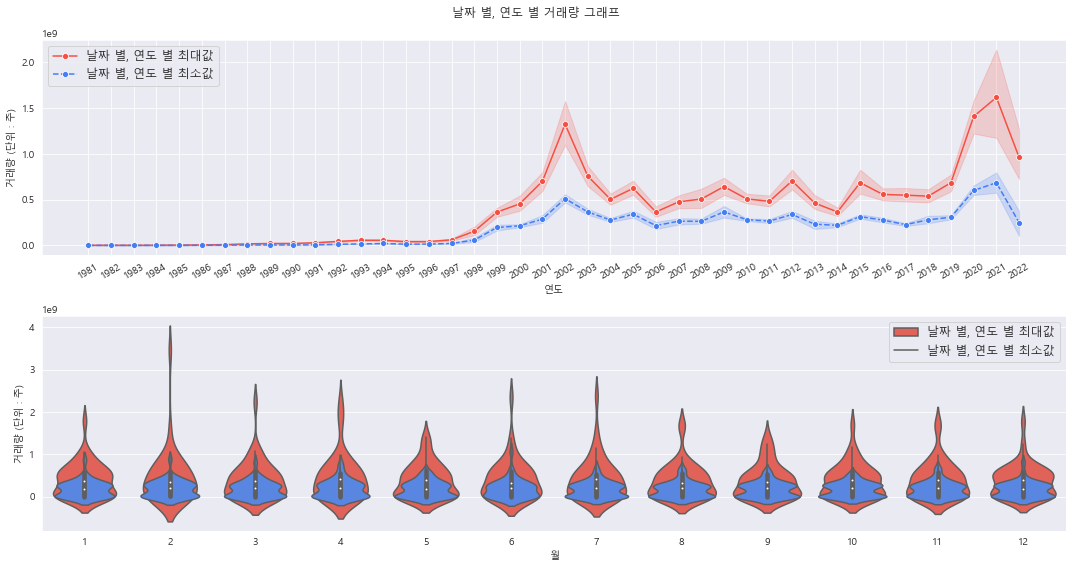

In [40]:
fig, ax=plt.subplots(2, 1, figsize=(15,8))

_=sns.lineplot(data=df_max, x="year", y="volume", ax=ax[0], marker="o", color="#F64F42", label="날짜 별, 연도 별 최대값")
_=sns.violinplot(data=df_max, x="month", y="volume", ax=ax[1], color="#F64F42")
_=sns.lineplot(data=df_min.reset_index(), x="year", y="volume", ax=ax[0], marker="o", linestyle="--", color="#437EF6", label="날짜 별, 연도 별 최소값")
_=sns.violinplot(data=df_min, x="month", y="volume", ax=ax[1], color="#437EF6")

_=ax[0].set_xlabel("연도")
_=ax[0].set_ylabel("거래량 (단위 : 주)")
_=ax[1].set_xlabel("월")
_=ax[1].set_ylabel("거래량 (단위 : 주)")

_=ax[1].set_xticklabels(list(np.arange(1, df_copy["month"].nunique()+1)))
_=ax[0].set_xticks(list(np.arange(df_copy["year"].unique()[0], df_copy["year"].unique()[-1]+1)))
_=ax[0].set_xticklabels(list(np.arange(df_copy["year"].unique()[0], df_copy["year"].unique()[-1]+1)), rotation=30)
# set_xticklabels(xlabels, rotation) 적어주기.

_=ax[0].legend(loc="upper left", fontsize=12)
_=ax[1].legend(["날짜 별, 연도 별 최대값", "날짜 별, 연도 별 최소값"], loc="upper right", fontsize=12)

_=plt.suptitle("날짜 별, 연도 별 거래량 그래프")
_=plt.tight_layout()
plt.savefig("images/날짜 별, 연도 별 거래량 그래프.png", dpi=200, facecolor="white")

거래량이 가장 많은 달은 거래량 분포 범위가 4*e^9 주까지도 분포합니다. 대부분 최대 거래량 분포 범위가 2*e^9 주 언저리까지 분포합니다. 그리고 최소 거래량은 0 주 ~ e^9 주 사이에 가장 많이 분포되어 있음을 알 수 있습니다. 최소 거래량인 달은 0 주 근처에 가장 많이 분포되어 있음을 알 수 있습니다. 그리고 최대 거래량일 때와는 거래량 분포 범위도 많이 차이가 남을 알 수 있습니다. 최대 거래량은 0 ~ e^9 주 사이에서 많이 분포되어 있음을 알 수 있습니다.

연도 별로 확인해보면, 1981년 ~ 1997년 까지는 연도 별 최대 거래량과 최소 거래량이 비슷함을 알 수 있습니다. 하지만 1998년부터 차이가 나기 시작하였고, 2002년과 2021년에 가장 차이가 크게 나타났습니다. 그리고 전체적으로 증가하는 경향을 띄고 있습니다.

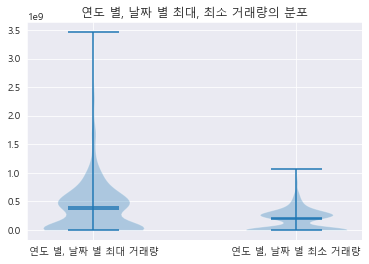

In [41]:
x_pos=[1, 2]
x_label=["연도 별, 날짜 별 최대 거래량", "연도 별, 날짜 별 최소 거래량"]

_=plt.violinplot([df_max["volume"], df_min["volume"]], showmeans=True, showmedians=True)
_=plt.xticks(x_pos, x_label)
_=plt.title("연도 별, 날짜 별 최대, 최소 거래량의 분포")
plt.savefig("images/연도 별, 날짜 별 최대, 최소 거래량의 분포.png", dpi=200, facecolor="white")

df_min, df_max를 연도, 월로 나누지 않고 전반적으로 바라보는 경우

1. 최대 거래량의 분포는 0에서 가장 많았고, 그 다음으로 0.5에서 많았습니다. 거래량은 0 ~ 3.5e^9 주까지 분포합니다.
2. 최소 거래량의 분포는 0에서 가장 많았고, 그 다음으로 0 ~ 0.5에서 많았습니다. 거래량은 0 ~ e^9 주 언저리까지 분포합니다.

In [42]:
df_copy.sort_values(by="date").head()

,date,yesterday,close,open,high,low,volume,change,monthly_ratio,year,month,day,dayofweek,pd_close
0,1981-05-01,1981-04-30,123.6,123.6,123.6,123.6,3330000.0,0.0098,0.98,1981,5,1,Friday,122.400475
1,1981-05-02,1981-05-01,123.5,123.5,123.5,123.5,2040000.0,-0.0008,-0.08,1981,5,2,Saturday,123.598879
2,1981-05-04,1981-05-03,120.6,120.6,120.6,120.6,1930000.0,-0.0235,-2.35,1981,5,4,Monday,123.502304
3,1981-05-06,1981-05-05,120.7,120.7,120.7,120.7,1690000.0,0.0008,0.08,1981,5,6,Wednesday,120.603517
4,1981-05-07,1981-05-06,119.3,119.3,119.3,119.3,1480000.0,-0.0116,-1.16,1981,5,7,Thursday,120.700121


In [43]:
df_copy.sort_values(by="volume", ascending=False).head(10)

,date,yesterday,close,open,high,low,volume,change,monthly_ratio,year,month,day,dayofweek,pd_close
10644,2021-02-19,2021-02-18,3107.62,3089.96,3109.67,3040.28,3.460000e+09,0.0068,0.68,2021,2,19,Friday,3086.630910
6048,2002-07-23,2002-07-22,743.52,715.81,743.52,709.37,2.380000e+09,0.0314,3.14,2002,7,23,Tuesday,720.884235
10646,2021-02-23,2021-02-22,3070.09,3069.26,3094.29,3035.46,2.360000e+09,-0.0031,-0.31,2021,2,23,Tuesday,3079.636874
10724,2021-06-16,2021-06-15,3278.68,3259.06,3281.96,3256.68,2.350000e+09,0.0062,0.62,2021,6,16,Wednesday,3258.477440
10688,2021-04-23,2021-04-22,3186.10,3173.47,3188.70,3146.54,2.250000e+09,0.0027,0.27,2021,4,23,Friday,3177.520694
10651,2021-03-03,2021-03-02,3082.99,3041.20,3083.04,3029.37,2.240000e+09,0.0129,1.29,2021,3,3,Wednesday,3043.725935
10639,2021-02-10,2021-02-09,3100.58,3088.13,3111.88,3064.25,2.150000e+09,0.0052,0.52,2021,2,10,Wednesday,3084.540390
6046,2002-07-19,2002-07-18,754.62,759.41,761.68,744.36,2.150000e+09,-0.0248,-2.48,2002,7,19,Friday,773.810500
10638,2021-02-09,2021-02-08,3084.67,3102.25,3129.66,3084.67,2.150000e+09,-0.0021,-0.21,2021,2,9,Tuesday,3091.161439
6044,2002-07-16,2002-07-15,771.45,785.28,792.61,767.87,1.980000e+09,-0.0154,-1.54,2002,7,16,Tuesday,783.516149


거래량이 많은 순서대로 상위 10개를 살펴보니, 2021년과 2002년이 많았습니다. 2021년과 2002년에 어떤 일이 일어났었는지 알아봐야 합니다.

In [44]:
change_positive=df_copy.loc[df_copy["change"]>=0] # 등락률이 양수인 경우
change_positive

,date,yesterday,close,open,high,low,volume,change,monthly_ratio,year,month,day,dayofweek,pd_close
0,1981-05-01,1981-04-30,123.60,123.60,123.60,123.60,3330000.0,0.0098,0.98,1981,5,1,Friday,122.400475
3,1981-05-06,1981-05-05,120.70,120.70,120.70,120.70,1690000.0,0.0008,0.08,1981,5,6,Wednesday,120.603517
6,1981-05-09,1981-05-08,118.80,118.80,118.80,118.80,598000.0,0.0008,0.08,1981,5,9,Saturday,118.705036
7,1981-05-12,1981-05-11,118.80,118.80,118.80,118.80,543000.0,0.0000,0.00,1981,5,12,Tuesday,118.800000
8,1981-05-13,1981-05-12,119.90,119.90,119.90,119.90,858000.0,0.0093,0.93,1981,5,13,Wednesday,118.795205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11018,2022-08-24,2022-08-23,2447.45,2446.18,2454.01,2430.69,423500000.0,0.0050,0.50,2022,8,24,Wednesday,2435.273632
11019,2022-08-25,2022-08-24,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,1.22,2022,8,25,Thursday,2447.401699
11020,2022-08-26,2022-08-25,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,0.15,2022,8,26,Friday,2477.314029
11022,2022-08-30,2022-08-29,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,0.99,2022,8,30,Tuesday,2426.903654


In [45]:
df1=change_positive.groupby(["date"])["change"].mean().reset_index()
df1

,date,change
0,1981-05-01,0.0098
1,1981-05-06,0.0008
2,1981-05-09,0.0008
3,1981-05-12,0.0000
4,1981-05-13,0.0093
...,...,...
5721,2022-08-24,0.0050
5722,2022-08-25,0.0122
5723,2022-08-26,0.0015
5724,2022-08-30,0.0099


In [46]:
change_negative=df_copy.loc[df_copy["change"]<0] # 등략률이 음수인 경우
change_negative

,date,yesterday,close,open,high,low,volume,change,monthly_ratio,year,month,day,dayofweek,pd_close
1,1981-05-02,1981-05-01,123.50,123.50,123.50,123.50,2040000.0,-0.0008,-0.08,1981,5,2,Saturday,123.598879
2,1981-05-04,1981-05-03,120.60,120.60,120.60,120.60,1930000.0,-0.0235,-2.35,1981,5,4,Monday,123.502304
4,1981-05-07,1981-05-06,119.30,119.30,119.30,119.30,1480000.0,-0.0116,-1.16,1981,5,7,Thursday,120.700121
5,1981-05-08,1981-05-07,118.70,118.70,118.70,118.70,1090000.0,-0.0050,-0.50,1981,5,8,Friday,119.296482
10,1981-05-15,1981-05-14,121.40,121.40,121.40,121.40,1550000.0,-0.0008,-0.08,1981,5,15,Friday,121.497198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11014,2022-08-18,2022-08-17,2508.05,2499.30,2515.37,2488.09,381630000.0,-0.0033,-0.33,2022,8,18,Thursday,2516.353968
11015,2022-08-19,2022-08-18,2492.69,2510.72,2510.72,2492.69,459830000.0,-0.0061,-0.61,2022,8,19,Friday,2507.988731
11016,2022-08-22,2022-08-21,2462.50,2467.38,2475.77,2457.08,422550000.0,-0.0121,-1.21,2022,8,22,Monday,2492.661201
11017,2022-08-23,2022-08-22,2435.34,2449.31,2454.55,2431.83,471170000.0,-0.0110,-1.10,2022,8,23,Tuesday,2462.426694


In [47]:
df2=change_negative.groupby(["date"])["change"].mean().reset_index()
df2

,date,change
0,1981-05-02,-0.0008
1,1981-05-04,-0.0235
2,1981-05-07,-0.0116
3,1981-05-08,-0.0050
4,1981-05-15,-0.0008
...,...,...
5293,2022-08-18,-0.0033
5294,2022-08-19,-0.0061
5295,2022-08-22,-0.0121
5296,2022-08-23,-0.0110


In [48]:
df_copy.shape

(11024, 14)

In [49]:
print(change_positive.shape)
print(change_negative.shape)

(5726, 14)
(5298, 14)


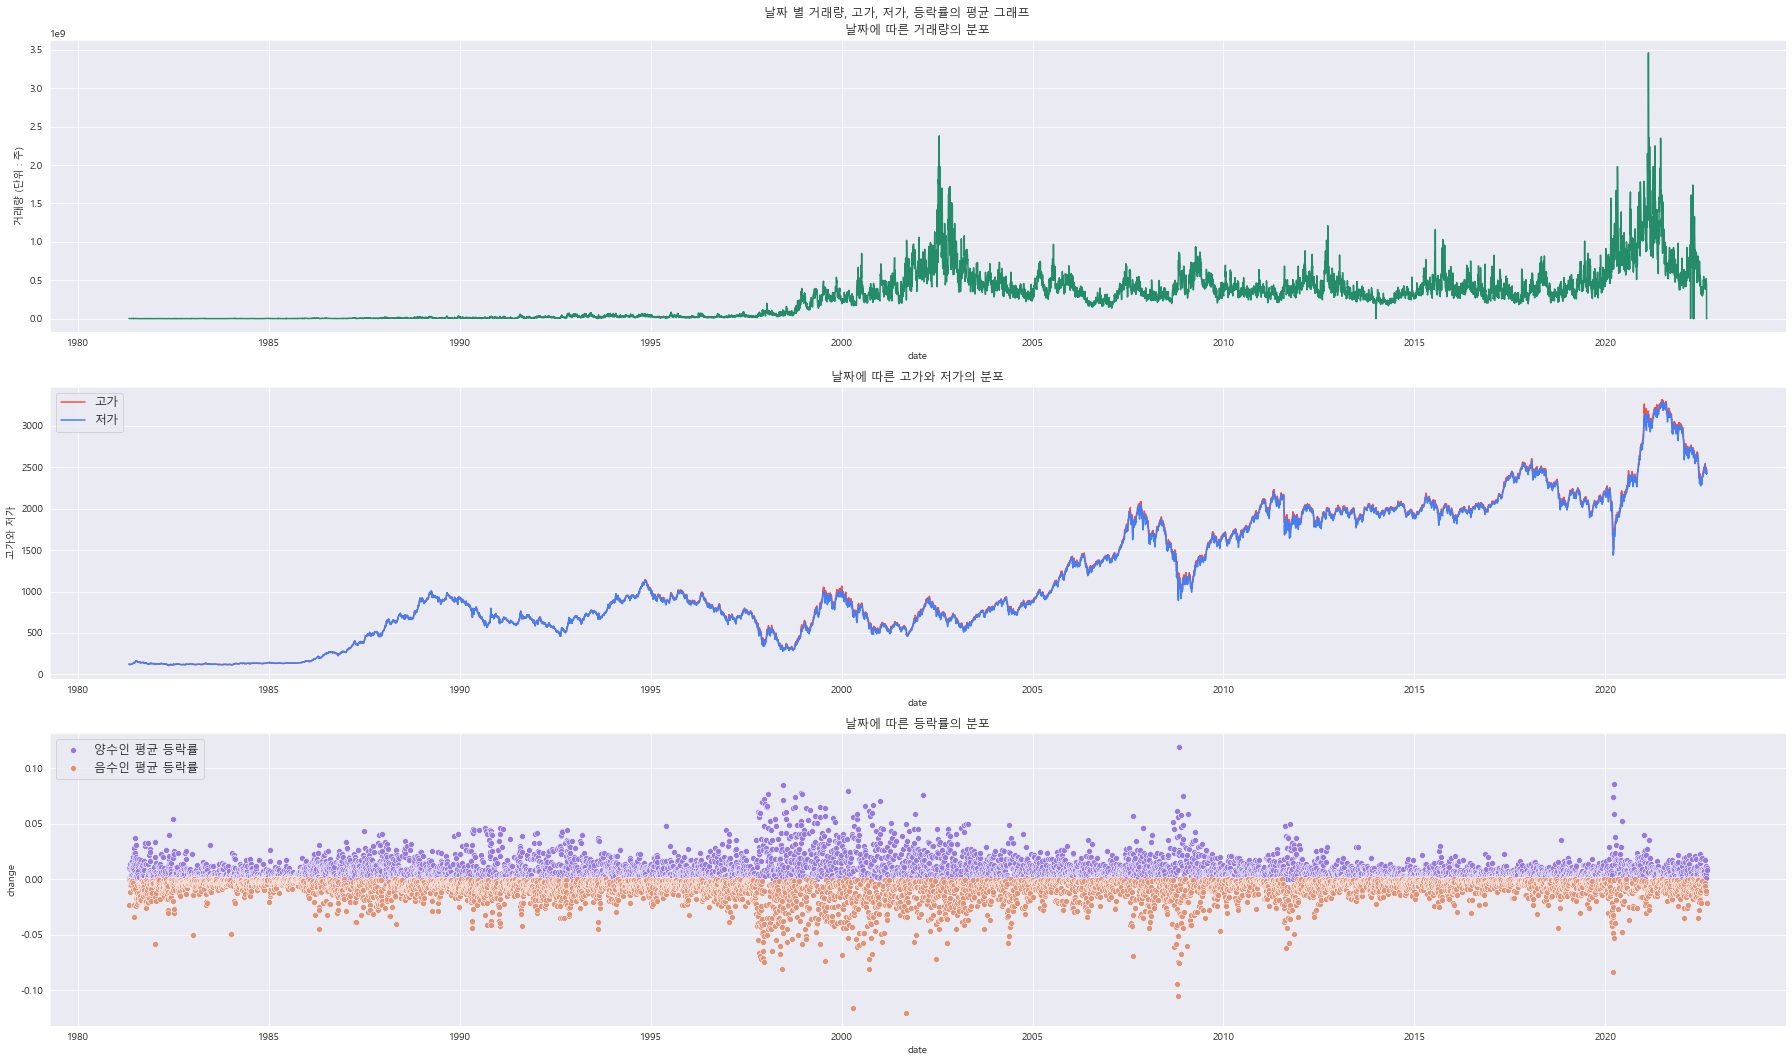

In [50]:
fig, ax=plt.subplots(3,1, figsize=(25, 15))

_=sns.lineplot(data=df_copy, x="date", y="volume", ax=ax[0], color="#258C6A")
_=sns.lineplot(data=df_copy, x="date", y="high", ax=ax[1], color="#F64F42", label="고가")
_=sns.lineplot(data=df_copy, x="date", y="low", ax=ax[1], color="#437EF6", label="저가")
_=sns.scatterplot(data=df1, x="date", y="change", ax=ax[2], color="#967BDC", label="양수인 평균 등락률")
_=sns.scatterplot(data=df2, x="date", y="change", ax=ax[2], color="#DC957B", label="음수인 평균 등락률")

_=ax[0].set_ylabel("거래량 (단위 : 주)")
_=ax[1].set_ylabel("고가와 저가")
_=ax[1].legend(loc="upper left", fontsize=12)
_=ax[2].legend(loc="upper left", fontsize=12)

_=ax[0].set_title("날짜에 따른 거래량의 분포")
_=ax[1].set_title("날짜에 따른 고가와 저가의 분포")
_=ax[2].set_title("날짜에 따른 등락률의 분포")

_=plt.suptitle("날짜 별 거래량, 고가, 저가, 등락률의 평균 그래프")
_=plt.tight_layout()
plt.savefig("images/날짜 별 거래량, 고가, 저가, 등락률의 평균 그래프.png", dpi=200, facecolor="white")
plt.subplots_adjust(top=0.95) # suptitle과 title이 겹치는 경우에 subplots_adjust를 이용하여 간격을 조정해줄 수 있습니다.

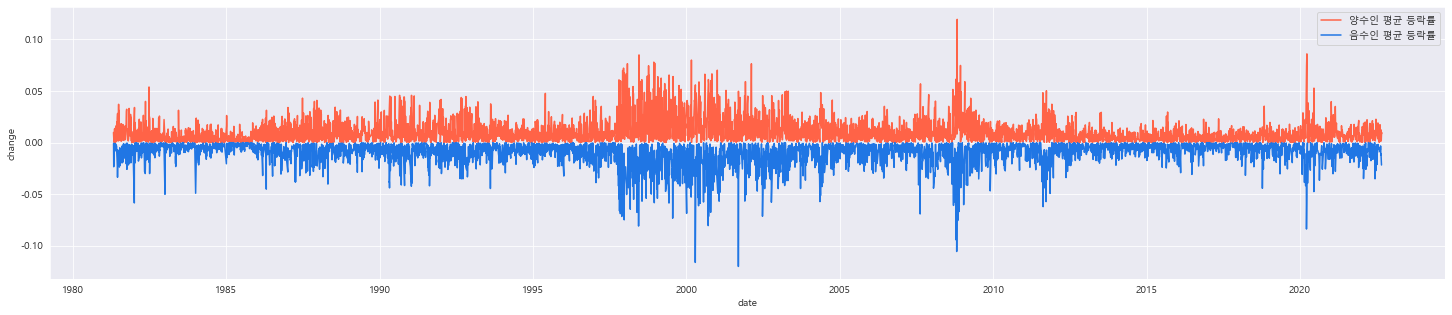

In [51]:
fig, ax=plt.subplots(figsize=(25,5))

_=sns.lineplot(data=df1, x="date", y="change", ax=ax, color="tomato", label="양수인 평균 등락률")
_=sns.lineplot(data=df2, x="date", y="change", ax=ax, color="#2076E4", label="음수인 평균 등락률")

plt.savefig("images/날짜 별 양수, 음수 평균 등락률.png", dpi=200, facecolor="white")

대체적으로 고가와 저가는 같이 증가하는 추세를 보이고 있습니다. 그리고 거래량은 2002년과 2021년에 급격하게 증가하였습니다. 하지만 계속 증가하는 추세를 띄고 있지는 않습니다. 마지막 그래프는 등략률의 양수와 음수를 나누어서 평균의 분포를 알아보았습니다. 등락률의 평균의 차이가 큰 부분들은 전년도에 비해 변화한 정도의 평균을 의미하고 있습니다. 즉, 평균 변화가 큰 지점을 의미합니다. 그리고 등락률의 차이가 큰 지점과 거래량이 큰 지점이 동일하지는 않습니다. (등락률과 거래량의 관계가 있다고 볼 수 없습니다.) 

In [52]:
df1.sort_values(by="change", ascending=False).head(3)

,date,change
3901,2008-10-30,0.1195
5388,2020-03-24,0.0860
2500,1998-06-17,0.0850


양수인 평균 등락률이 큰 상위 3개의 지점은 2008년 10월, 2020년 3월, 그리고 1998년 6월 입니다.

In [53]:
corr=df_copy.corr() # 상관계수 구하기.
corr

,close,open,high,low,volume,change,monthly_ratio,year,month,day,pd_close
close,1.000000,0.999869,0.999926,0.999937,0.639874,-0.001428,-0.001428,0.923641,-0.009398,0.002872,0.999786
open,0.999869,1.000000,0.999946,0.999917,0.639808,-0.011343,-0.011343,0.923601,-0.009369,0.003113,0.999910
high,0.999926,0.999946,1.000000,0.999886,0.641940,-0.007324,-0.007324,0.924667,-0.009486,0.003011,0.999869
low,0.999937,0.999917,0.999886,1.000000,0.637524,-0.005705,-0.005705,0.922444,-0.009282,0.002951,0.999827
volume,0.639874,0.639808,0.641940,0.637524,1.000000,0.016387,0.016387,0.729982,-0.022247,-0.000711,0.639566
change,-0.001428,-0.011343,-0.007324,-0.005705,0.016387,1.000000,1.000000,-0.008261,0.001935,-0.013635,-0.018751
monthly_ratio,-0.001428,-0.011343,-0.007324,-0.005705,0.016387,1.000000,1.000000,-0.008261,0.001935,-0.013635,-0.018751
year,0.923641,0.923601,0.924667,0.922444,0.729982,-0.008261,-0.008261,1.000000,-0.026507,0.003625,0.923629
month,-0.009398,-0.009369,-0.009486,-0.009282,-0.022247,0.001935,0.001935,-0.026507,1.000000,-0.029333,-0.009509
day,0.002872,0.003113,0.003011,0.002951,-0.000711,-0.013635,-0.013635,0.003625,-0.029333,1.000000,0.003127


In [54]:
mask=np.zeros_like(corr)
mask

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [55]:
mask[np.triu_indices_from(mask)]=True # 상부 삼각형에 대한 인덱스를 반환해줍니다.

In [56]:
mask # 대각선 위의 부분을 모두 1로 만들어줄 수 있습니다.

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

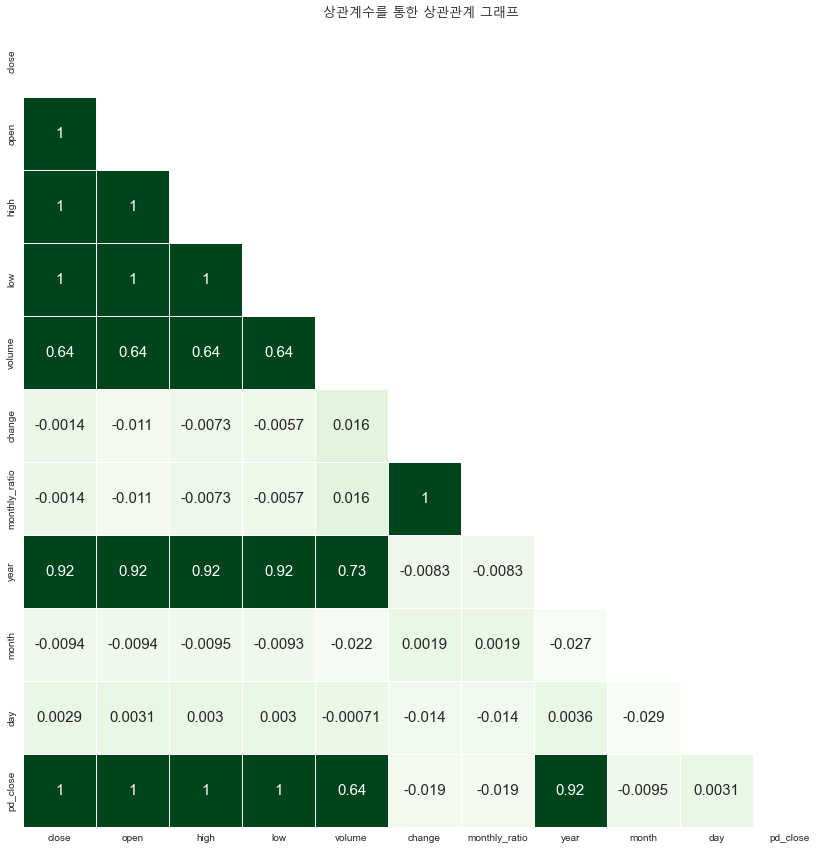

In [57]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(12,12))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=0.5, annot=True, 
                     annot_kws={"size":15}, cmap="Greens", cbar=False)
    
_=plt.suptitle("상관계수를 통한 상관관계 그래프", fontsize=13)
plt.tight_layout()
plt.savefig("images/상관계수를 통한 상관관계 그래프.png", dpi=200, facecolor="white")

1. 완벽한 정비례 관계 & 연관성이 큼 : 자기 자신과의 관계가 1이기 때문에, 상관계수가 1이면 완벽한 정비례 관계를 의미합니다.

* close ~ open 
* close ~ high
* close ~ low
* open ~ high
* open ~ low
* high ~ low
* change ~ monthly_ratio
* close ~ pd_close
* open ~ pd_close
* high ~ pd_close
* low ~ pd_close

2. 정비례 관계 : 상관계수가 양수이기 때문에, 연관성이 꽤 있는 편입니다.

* year ~ pd_close
* close ~ year
* open ~ year
* high ~ year
* low ~ year


3. 반비례 관계 : 상관계수가 음수이기 때문에, 연관성이 꽤 약한 편입니다.

* open ~ month
* close ~ month
* high ~ month
* low ~ month

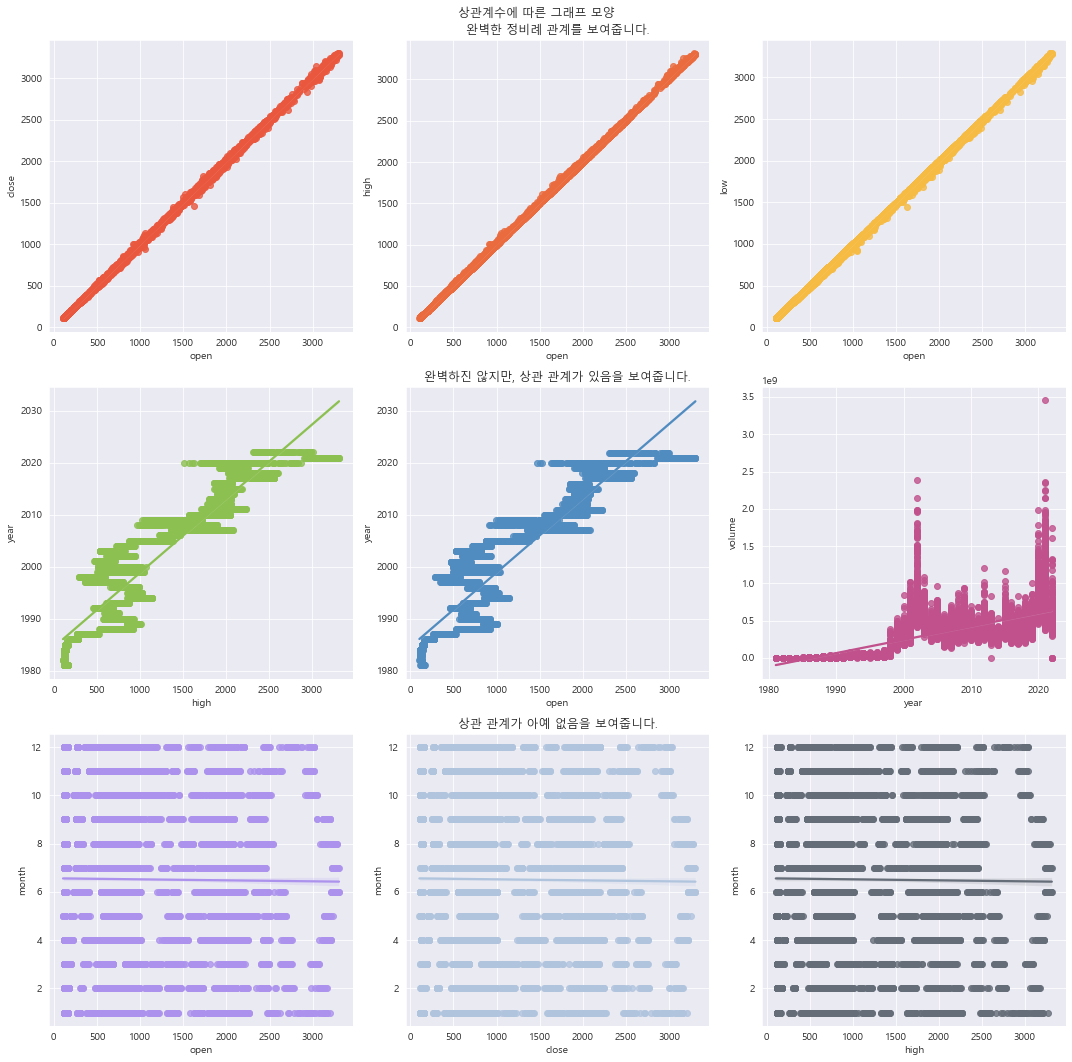

In [58]:
fig, ax=plt.subplots(3,3, figsize=(15,15))
ax=ax.flatten()

# 완벽한 정비례 관계를 보여줍니다.
_=sns.regplot(data=df_copy, x="open", y="close", ax=ax[0], color="#E9573E")
_=sns.regplot(data=df_copy, x="open", y="high", ax=ax[1], color="#E96B3E")
_=sns.regplot(data=df_copy, x="open", y="low", ax=ax[2], color="#F6BB43")

# 완벽하진 않지만, 상관 관계가 있음을 보여줍니다.
_=sns.regplot(data=df_copy, x="high", y="year", ax=ax[3], color="#8CC051")
_=sns.regplot(data=df_copy, x="open", y="year", ax=ax[4], color="#518CC0")
_=sns.regplot(data=df_copy, x="year", y="volume", ax=ax[5], color="#C0518C")

# 상관 관계가 아예 없음을 보여줍니다.
_=sns.regplot(data=df_copy, x="open", y="month", ax=ax[6], color="#AC92ED")
_=sns.regplot(data=df_copy, x="close", y="month", ax=ax[7], color="#B0C4DE")
_=sns.regplot(data=df_copy, x="high", y="month", ax=ax[8], color="#656D78")

_=ax[1].set_title("완벽한 정비례 관계를 보여줍니다.")
_=ax[4].set_title("완벽하진 않지만, 상관 관계가 있음을 보여줍니다.")
_=ax[7].set_title("상관 관계가 아예 없음을 보여줍니다.")

_=plt.suptitle("상관계수에 따른 그래프 모양")
plt.tight_layout()
plt.savefig("images/상관계수에 따른 그래프 모양.png", dpi=200, facecolor="white")
plt.subplots_adjust(top=0.95) # suptitle과 title이 겹치는 경우에 subplots_adjust를 이용하여 간격을 조정해줄 수 있습니다.

1. 완벽한 상관 관계 : 상관 계수가 1임을 의미하고, 완벽한 정비례를 보여줍니다.
2. 상관 관계가 있는 관계 : 완벽한 정비례는 아니지만, 선 근처에 데이터가 존재함을 알 수 있습니다.
3. 상관 관계가 아예 없는 관계 : 선 근처에 데이터가 존재하지 않음을 알 수 있습니다.

In [59]:
df_copy.head()

,date,yesterday,close,open,high,low,volume,change,monthly_ratio,year,month,day,dayofweek,pd_close
0,1981-05-01,1981-04-30,123.6,123.6,123.6,123.6,3330000.0,0.0098,0.98,1981,5,1,Friday,122.400475
1,1981-05-02,1981-05-01,123.5,123.5,123.5,123.5,2040000.0,-0.0008,-0.08,1981,5,2,Saturday,123.598879
2,1981-05-04,1981-05-03,120.6,120.6,120.6,120.6,1930000.0,-0.0235,-2.35,1981,5,4,Monday,123.502304
3,1981-05-06,1981-05-05,120.7,120.7,120.7,120.7,1690000.0,0.0008,0.08,1981,5,6,Wednesday,120.603517
4,1981-05-07,1981-05-06,119.3,119.3,119.3,119.3,1480000.0,-0.0116,-1.16,1981,5,7,Thursday,120.700121


df_1980s, df_1990s, df_2000s, df_2010s, df_2020s, 즉 연도 대 별로 (1980년대, 1990년대, 2000년대, 2010년대, 2020년대) 데이터 프레임을 나눠보도록 하겠습니다. 그 다음으로 양수인 등락률과 음수인 등락률로 나눠보겠습니다.

In [60]:
df_copy.head()

,date,yesterday,close,open,high,low,volume,change,monthly_ratio,year,month,day,dayofweek,pd_close
0,1981-05-01,1981-04-30,123.6,123.6,123.6,123.6,3330000.0,0.0098,0.98,1981,5,1,Friday,122.400475
1,1981-05-02,1981-05-01,123.5,123.5,123.5,123.5,2040000.0,-0.0008,-0.08,1981,5,2,Saturday,123.598879
2,1981-05-04,1981-05-03,120.6,120.6,120.6,120.6,1930000.0,-0.0235,-2.35,1981,5,4,Monday,123.502304
3,1981-05-06,1981-05-05,120.7,120.7,120.7,120.7,1690000.0,0.0008,0.08,1981,5,6,Wednesday,120.603517
4,1981-05-07,1981-05-06,119.3,119.3,119.3,119.3,1480000.0,-0.0116,-1.16,1981,5,7,Thursday,120.700121


In [61]:
df_1980s=df_copy.loc[(df_copy["year"]>=1980)&(df_copy["year"]<1990)]
df_1990s=df_copy.loc[(df_copy["year"]>=1990)&(df_copy["year"]<2000)]
df_2000s=df_copy.loc[(df_copy["year"]>=2000)&(df_copy["year"]<2010)]
df_2010s=df_copy.loc[(df_copy["year"]>=2010)&(df_copy["year"]<2020)]
df_2020s=df_copy.loc[(df_copy["year"]>=2020)]

In [62]:
df_1980s

,date,yesterday,close,open,high,low,volume,change,monthly_ratio,year,month,day,dayofweek,pd_close
0,1981-05-01,1981-04-30,123.60,123.60,123.60,123.60,3330000.0,0.0098,0.98,1981,5,1,Friday,122.400475
1,1981-05-02,1981-05-01,123.50,123.50,123.50,123.50,2040000.0,-0.0008,-0.08,1981,5,2,Saturday,123.598879
2,1981-05-04,1981-05-03,120.60,120.60,120.60,120.60,1930000.0,-0.0235,-2.35,1981,5,4,Monday,123.502304
3,1981-05-06,1981-05-05,120.70,120.70,120.70,120.70,1690000.0,0.0008,0.08,1981,5,6,Wednesday,120.603517
4,1981-05-07,1981-05-06,119.30,119.30,119.30,119.30,1480000.0,-0.0116,-1.16,1981,5,7,Thursday,120.700121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,1989-12-20,1989-12-19,933.45,933.45,933.45,933.45,30730000.0,0.0072,0.72,1989,12,20,Wednesday,926.777204
2535,1989-12-21,1989-12-20,932.66,932.66,932.66,932.66,29900000.0,-0.0008,-0.08,1989,12,21,Thursday,933.406725
2536,1989-12-22,1989-12-21,936.20,936.20,936.20,936.20,35640000.0,0.0038,0.38,1989,12,22,Friday,932.655908
2537,1989-12-23,1989-12-22,932.99,932.99,932.99,932.99,19670000.0,-0.0034,-0.34,1989,12,23,Saturday,936.172988


In [63]:
df_1980s_pc=df_1980s.loc[df_1980s["change"]>0, ["date", "change"]]
df_1980s_pc

,date,change
0,1981-05-01,0.0098
3,1981-05-06,0.0008
6,1981-05-09,0.0008
8,1981-05-13,0.0093
9,1981-05-14,0.0133
...,...,...
2529,1989-12-14,0.0135
2531,1989-12-16,0.0042
2533,1989-12-19,0.0130
2534,1989-12-20,0.0072


In [64]:
df_1980s_nc=df_1980s.loc[df_1980s["change"]<0, ["date", "change"]]
df_1980s_nc

,date,change
1,1981-05-02,-0.0008
2,1981-05-04,-0.0235
4,1981-05-07,-0.0116
5,1981-05-08,-0.0050
10,1981-05-15,-0.0008
...,...,...
2530,1989-12-15,-0.0108
2532,1989-12-18,-0.0075
2535,1989-12-21,-0.0008
2537,1989-12-23,-0.0034


In [65]:
df_1990s_pc=df_1990s.loc[df_1990s["change"]>0, ["date", "change"]]
df_1990s_pc

,date,change
2540,1990-01-04,0.0223
2543,1990-01-08,0.0072
2544,1990-01-09,0.0008
2550,1990-01-16,0.0004
2552,1990-01-18,0.0005
...,...,...
5422,1999-12-22,0.0094
5423,1999-12-23,0.0065
5424,1999-12-24,0.0179
5425,1999-12-27,0.0142


In [66]:
df_1990s_nc=df_1990s.loc[df_1990s["change"]<0, ["date", "change"]]
df_1990s_nc

,date,change
2539,1990-01-03,-0.0012
2541,1990-01-05,-0.0148
2542,1990-01-06,-0.0025
2545,1990-01-10,-0.0095
2546,1990-01-11,-0.0090
...,...,...
5415,1999-12-13,-0.0044
5416,1999-12-14,-0.0109
5417,1999-12-15,-0.0390
5418,1999-12-16,-0.0156


In [67]:
df_2000s_pc=df_2000s.loc[df_2000s["change"]>0, ["date", "change"]]
df_2000s_pc

,date,change
5427,2000-01-04,0.0301
5431,2000-01-10,0.0407
5436,2000-01-17,0.0372
5439,2000-01-20,0.0076
5441,2000-01-24,0.0017
...,...,...
7891,2009-12-22,0.0069
7892,2009-12-23,0.0035
7893,2009-12-24,0.0126
7894,2009-12-28,0.0019


In [68]:
df_2000s_nc=df_2000s.loc[df_2000s["change"]<0, ["date", "change"]]
df_2000s_nc

,date,change
5428,2000-01-05,-0.0687
5429,2000-01-06,-0.0259
5430,2000-01-07,-0.0126
5432,2000-01-11,-0.0060
5433,2000-01-12,-0.0268
...,...,...
7887,2009-12-16,-0.0010
7888,2009-12-17,-0.0099
7889,2009-12-18,-0.0005
7890,2009-12-21,-0.0017


In [69]:
df_2010s_pc=df_2010s.loc[df_2010s["change"]>0, ["date", "change"]]
df_2010s_pc

,date,change
7897,2010-01-04,0.0079
7899,2010-01-06,0.0087
7901,2010-01-08,0.0070
7903,2010-01-12,0.0027
7905,2010-01-14,0.0086
...,...,...
10355,2019-12-17,0.0127
10357,2019-12-19,0.0008
10358,2019-12-20,0.0035
10361,2019-12-26,0.0036


In [70]:
df_2010s_nc=df_2010s.loc[df_2010s["change"]<0, ["date", "change"]]
df_2010s_nc

,date,change
7898,2010-01-05,-0.0033
7900,2010-01-07,-0.0128
7902,2010-01-11,-0.0007
7904,2010-01-13,-0.0160
7908,2010-01-19,-0.0009
...,...,...
10354,2019-12-16,-0.0010
10356,2019-12-18,-0.0004
10359,2019-12-23,-0.0002
10360,2019-12-24,-0.0062


In [71]:
df_2020s_pc=df_2020s.loc[df_2020s["change"]>0, ["date", "change"]]
df_2020s_pc

,date,change
10365,2020-01-03,0.0006
10367,2020-01-07,0.0095
10369,2020-01-09,0.0163
10370,2020-01-10,0.0091
10371,2020-01-13,0.0104
...,...,...
11018,2022-08-24,0.0050
11019,2022-08-25,0.0122
11020,2022-08-26,0.0015
11022,2022-08-30,0.0099


In [72]:
df_2020s_nc=df_2020s.loc[df_2020s["change"]<0, ["date", "change"]]
df_2020s_nc

,date,change
10364,2020-01-02,-0.0102
10366,2020-01-06,-0.0098
10368,2020-01-08,-0.0111
10373,2020-01-15,-0.0035
10377,2020-01-21,-0.0101
...,...,...
11014,2022-08-18,-0.0033
11015,2022-08-19,-0.0061
11016,2022-08-22,-0.0121
11017,2022-08-23,-0.0110


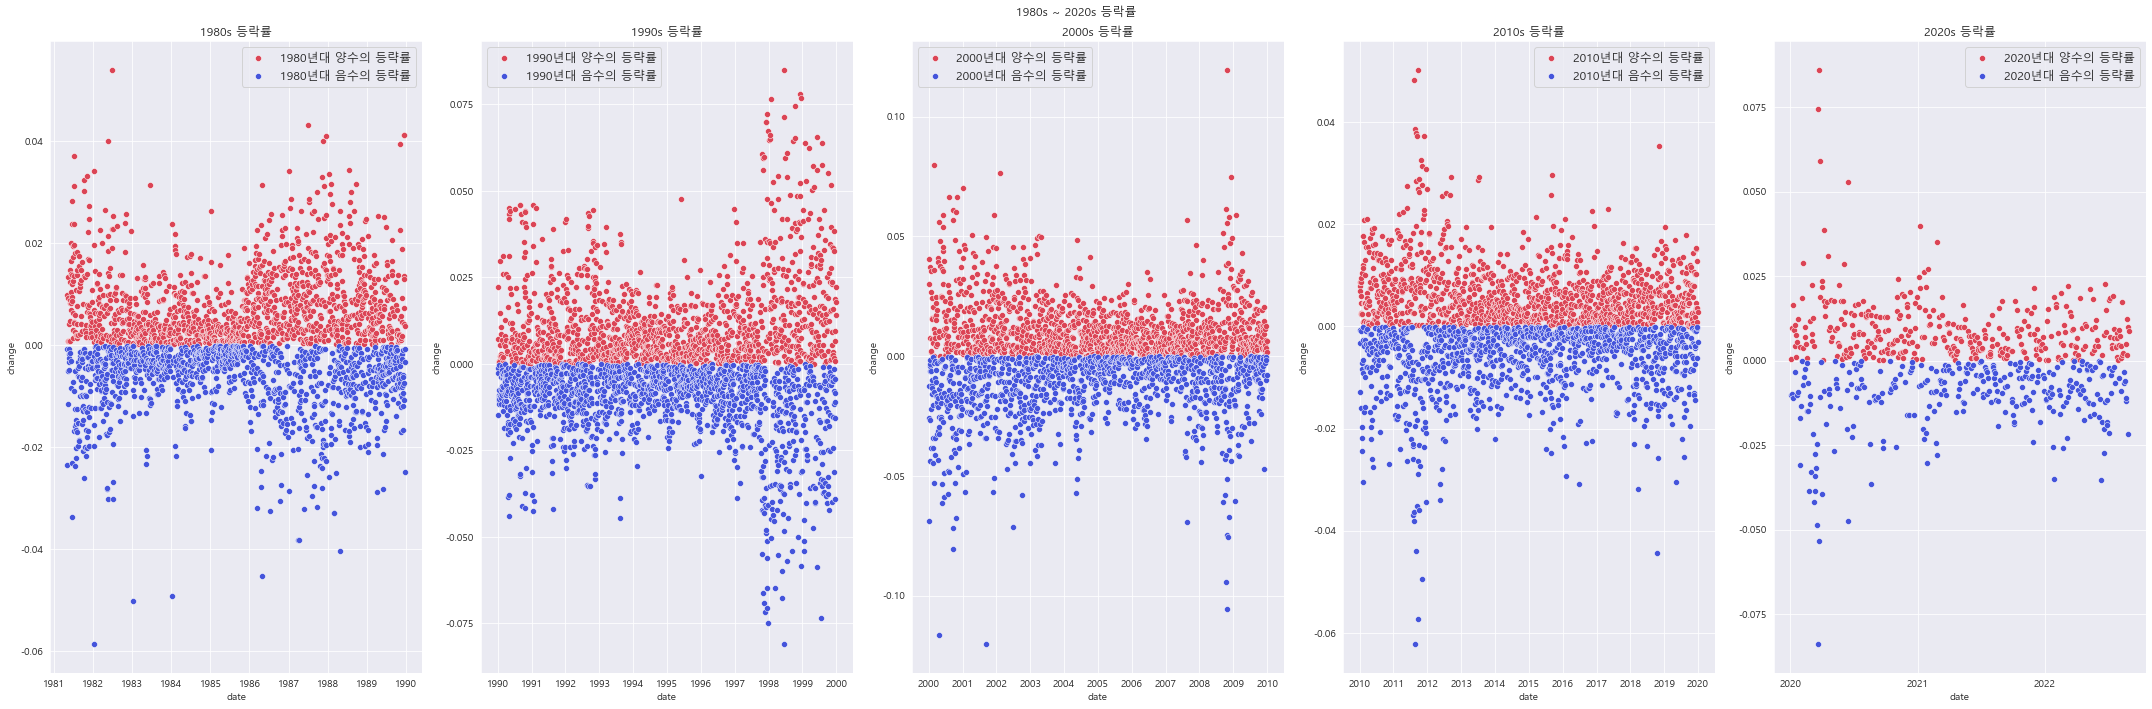

In [73]:
fig, ax=plt.subplots(1,5, figsize=(30,10))

idx=0
label=["1980", "1990", "2000", "2010", "2020"]

for ii in [df_1980s_pc, df_1990s_pc, df_2000s_pc, df_2010s_pc, df_2020s_pc]:
    _=sns.scatterplot(data=ii, x="date", y="change", ax=ax[idx], color="#DB4455", label="{}년대 양수의 등략률".format(label[idx]))
    idx+=1

idx=0
for ii in [df_1980s_nc, df_1990s_nc, df_2000s_nc, df_2010s_nc, df_2020s_nc]:
    _=sns.scatterplot(data=ii, x="date", y="change", ax=ax[idx], color="#4454DB", label="{}년대 음수의 등략률".format(label[idx]))
    idx+=1
    
for ii in range(0,5):
    _=ax[ii].legend(fontsize=12)
    
_=ax[4].set_xticks(["2020-01", "2021-01", "2022-01"])
_=ax[4].set_xticklabels(["2020", "2021", "2022"])

for ii in range(0,5):
    _=ax[ii].set_title("{}s 등락률".format(label[ii]))

_=plt.suptitle("1980s ~ 2020s 등락률")
plt.tight_layout()
plt.savefig("images/1980s ~ 2020s 등락률.png", dpi=200, facecolor="white")

아래의 코드를 반복문을 이용하여, 짧고 간결하게 만들었습니다.

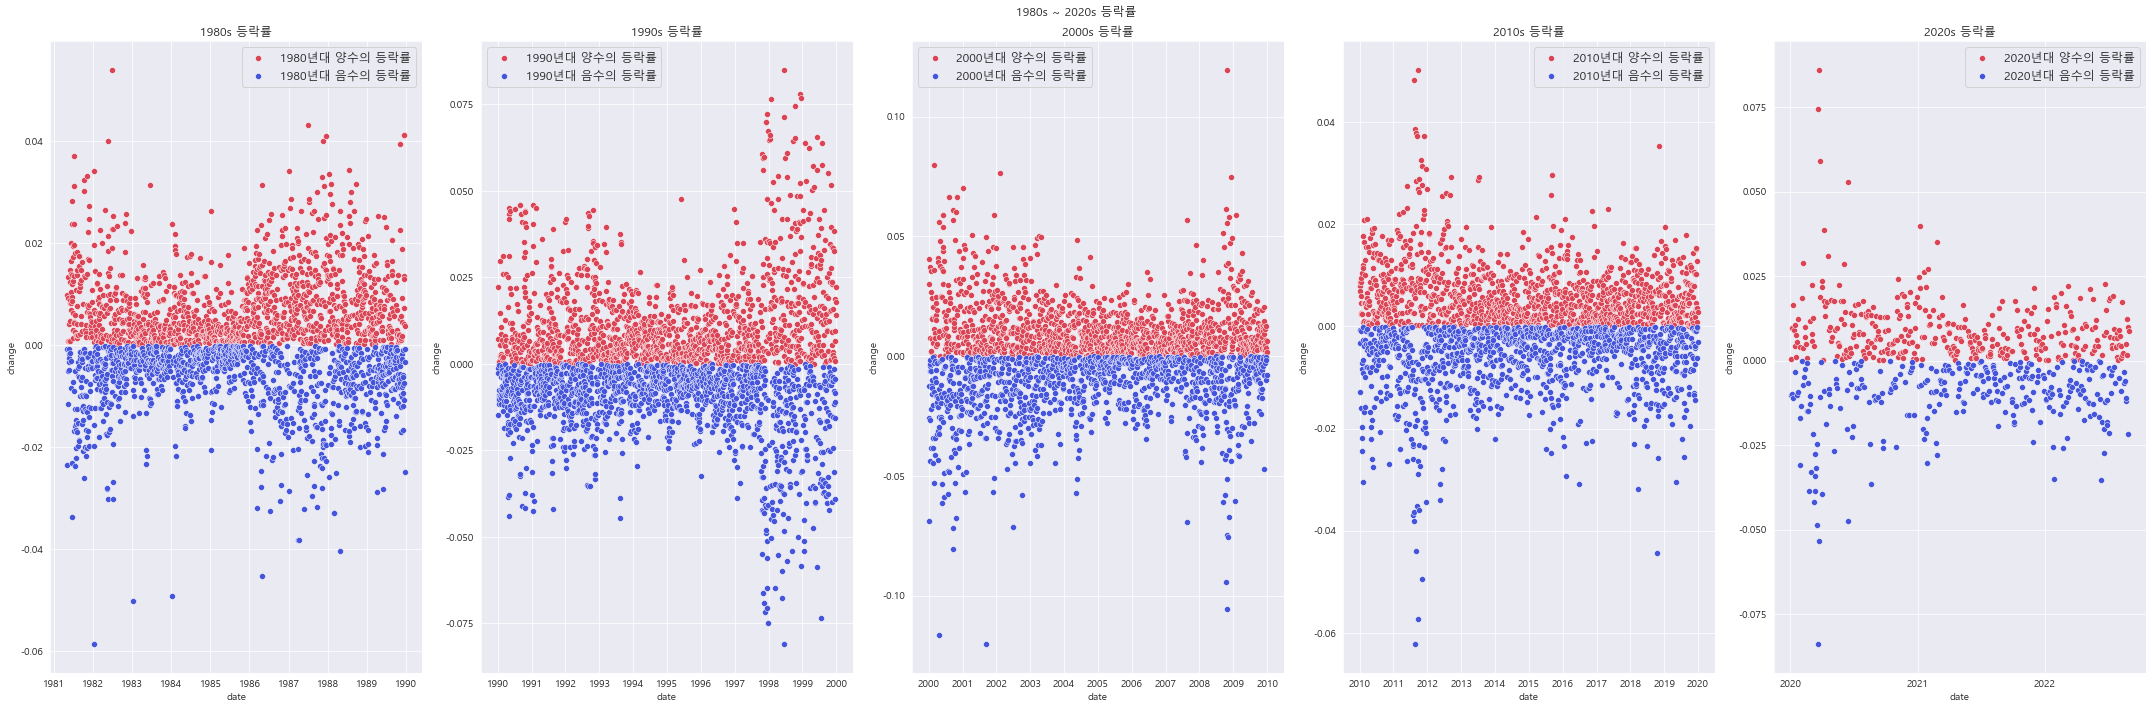

In [263]:
fig, ax=plt.subplots(1,5, figsize=(30,10))

_=sns.scatterplot(data=df_1980s_pc, x="date", y="change", ax=ax[0], color="#DB4455", label="1980년대 양수의 등락률")
_=sns.scatterplot(data=df_1980s_nc, x="date", y="change", ax=ax[0], color="#4454DB", label="1980년대 음수의 등락률")
_=sns.scatterplot(data=df_1990s_pc, x="date", y="change", ax=ax[1], color="#DB4455", label="1990년대 양수의 등락률")
_=sns.scatterplot(data=df_1990s_nc, x="date", y="change", ax=ax[1], color="#4454DB", label="1990년대 음수의 등락률")
_=sns.scatterplot(data=df_2000s_pc, x="date", y="change", ax=ax[2], color="#DB4455", label="2000년대 양수의 등락률")
_=sns.scatterplot(data=df_2000s_nc, x="date", y="change", ax=ax[2], color="#4454DB", label="2000년대 음수의 등락률")
_=sns.scatterplot(data=df_2010s_pc, x="date", y="change", ax=ax[3], color="#DB4455", label="2010년대 양수의 등락률")
_=sns.scatterplot(data=df_2010s_nc, x="date", y="change", ax=ax[3], color="#4454DB", label="2010년대 음수의 등락률")
_=sns.scatterplot(data=df_2020s_pc, x="date", y="change", ax=ax[4], color="#DB4455", label="2020년대 양수의 등락률")
_=sns.scatterplot(data=df_2020s_nc, x="date", y="change", ax=ax[4], color="#4454DB", label="2020년대 음수의 등락률")

for ii in range(0,5):
    _=ax[ii].legend(fontsize=12)
    
_=ax[4].set_xticks(["2020-01", "2021-01", "2022-01"])
_=ax[4].set_xticklabels(["2020", "2021", "2022"])

_=ax[0].set_title("1980s 등락률")
_=ax[1].set_title("1990s 등락률")
_=ax[2].set_title("2000s 등락률")
_=ax[3].set_title("2010s 등락률")
_=ax[4].set_title("2020s 등락률")

_=plt.suptitle("1980s ~ 2020s 등락률")
plt.tight_layout()
plt.savefig("images/1980s ~ 2020s 등락률.png", dpi=200, facecolor="white")

1. 1980 년 대에는 1985 ~ 1986 년에 가장 등락률의 변화가 적었다. (그 사이에 경제의 변화가 크지 않음을 알 수 있습니다.)
2. 1990 년 대에는 1998 ~ 2000 년에 가장 등락률의 변화가 컸다. (그 사이에 경제의 변화가 큼을 알 수 있습니다.)
3. 2000 년 대에는 2009 년 언저리에 가장 등락률의 변화가 컸다.
4. 2010 년 대에는 2011 ~ 2012 년에 가장 등락률의 변화가 컸다.
5. 2020 년 대에는 2020 년 초반에 가장 등락률의 변화가 컸다.
6. 대부분의 양수 등락률은 ∪ 자 형태를 띄고 있고, 음수 등락률 또한 ∩ 자 형태를 띄고 있습니다.
7. 대략적으로 0을 기준으로 대칭인 형태를 띄고 있습니다.

In [74]:
df_copy.head()

,date,yesterday,close,open,high,low,volume,change,monthly_ratio,year,month,day,dayofweek,pd_close
0,1981-05-01,1981-04-30,123.6,123.6,123.6,123.6,3330000.0,0.0098,0.98,1981,5,1,Friday,122.400475
1,1981-05-02,1981-05-01,123.5,123.5,123.5,123.5,2040000.0,-0.0008,-0.08,1981,5,2,Saturday,123.598879
2,1981-05-04,1981-05-03,120.6,120.6,120.6,120.6,1930000.0,-0.0235,-2.35,1981,5,4,Monday,123.502304
3,1981-05-06,1981-05-05,120.7,120.7,120.7,120.7,1690000.0,0.0008,0.08,1981,5,6,Wednesday,120.603517
4,1981-05-07,1981-05-06,119.3,119.3,119.3,119.3,1480000.0,-0.0116,-1.16,1981,5,7,Thursday,120.700121


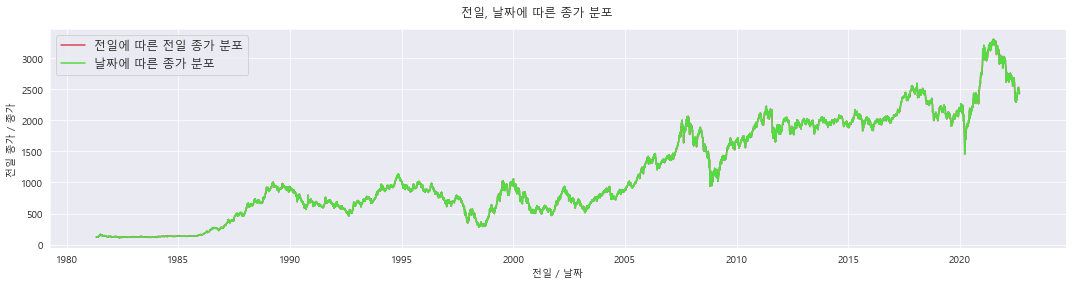

In [81]:
fig, ax=plt.subplots(1,1, figsize=(15,4))

_=sns.lineplot(data=df_copy, x="yesterday", y="pd_close", ax=ax, color="#DB4455", label="전일에 따른 전일 종가 분포")
_=sns.lineplot(data=df_copy, x="date", y="close", ax=ax, color="#55DB44", label="날짜에 따른 종가 분포")

_=ax.set_ylabel("전일 종가 / 종가")
_=ax.set_xlabel("전일 / 날짜")
_=ax.legend(fontsize=12)

_=plt.suptitle("전일, 날짜에 따른 종가 분포")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.savefig("images/전일, 날짜에 따른 종가 분포.png", dpi=200, facecolor="white")

전체적으로 종가도 증가하는 추세를 보이고 있습니다. 전일 종가와 종가가 크게 차이를 보이는 곳은 없어보입니다. (거의 오차가 없어 보입니다.) 전체적으로 조금씩 증가함을 보여주고 있습니다.

In [82]:
df_copy

,date,yesterday,close,open,high,low,volume,change,monthly_ratio,year,month,day,dayofweek,pd_close
0,1981-05-01,1981-04-30,123.60,123.60,123.60,123.60,3330000.0,0.0098,0.98,1981,5,1,Friday,122.400475
1,1981-05-02,1981-05-01,123.50,123.50,123.50,123.50,2040000.0,-0.0008,-0.08,1981,5,2,Saturday,123.598879
2,1981-05-04,1981-05-03,120.60,120.60,120.60,120.60,1930000.0,-0.0235,-2.35,1981,5,4,Monday,123.502304
3,1981-05-06,1981-05-05,120.70,120.70,120.70,120.70,1690000.0,0.0008,0.08,1981,5,6,Wednesday,120.603517
4,1981-05-07,1981-05-06,119.30,119.30,119.30,119.30,1480000.0,-0.0116,-1.16,1981,5,7,Thursday,120.700121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11019,2022-08-25,2022-08-24,2477.26,2459.79,2477.26,2455.32,426230000.0,0.0122,1.22,2022,8,25,Thursday,2447.401699
11020,2022-08-26,2022-08-25,2481.03,2489.14,2497.76,2476.75,520090000.0,0.0015,0.15,2022,8,26,Friday,2477.314029
11021,2022-08-29,2022-08-28,2426.89,2432.06,2432.89,2417.01,448750000.0,-0.0218,-2.18,2022,8,29,Monday,2480.975261
11022,2022-08-30,2022-08-29,2450.93,2441.21,2453.91,2433.48,327210.0,0.0099,0.99,2022,8,30,Tuesday,2426.903654


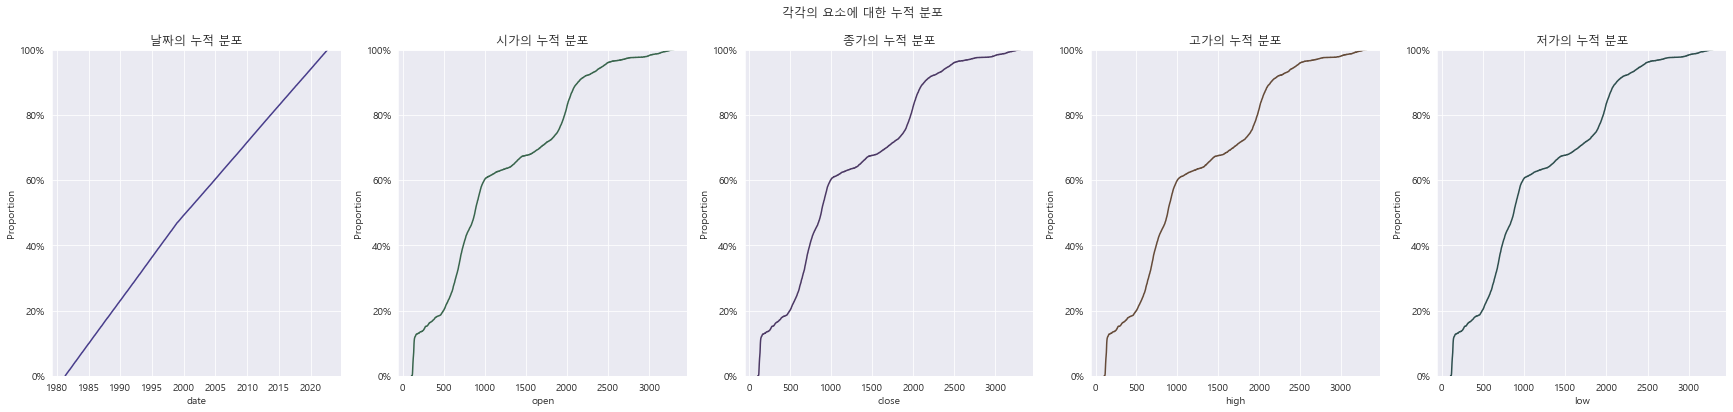

In [83]:
fig, ax=plt.subplots(1,5, figsize=(30, 6))

_=sns.ecdfplot(x=df_copy["date"], ax=ax[0], color="#483D8B")
_=sns.ecdfplot(x=df_copy["open"], ax=ax[1], color="#39654D")
_=sns.ecdfplot(x=df_copy["close"], ax=ax[2], color="#4C3965")
_=sns.ecdfplot(x=df_copy["high"], ax=ax[3], color="#654B39")
_=sns.ecdfplot(x=df_copy["low"], ax=ax[4], color="#2F4F4F")


for ii in range(0,5):
    _=ax[ii].set_yticks(ax[ii].get_yticks()) # UserWarning: FixedFormatter should only be used together with FixedLocator
    _=ax[ii].set_yticklabels(["0%", "20%", "40%", "60%", "80%", "100%"])
    
_=ax[0].set_title("날짜의 누적 분포")
_=ax[1].set_title("시가의 누적 분포")
_=ax[2].set_title("종가의 누적 분포")
_=ax[3].set_title("고가의 누적 분포")
_=ax[4].set_title("저가의 누적 분포")

_=plt.suptitle("각각의 요소에 대한 누적 분포")
plt.savefig("images/각각의 요소에 대한 누적 분포.png", dpi=200, facecolor="white")

1. 날짜인 경우에는 누적 분포의 비율이 그래도 비슷한 편에 속합니다. 2005년 기준 날짜의 60% 정도를 차지하고 있습니다. 
2. 시가, 종가, 고가, 저가인 경우, 50 ~ 1000인 경우에 20%로 가장 많은 비율을 차지하고 있고, 4개의 그래프 모두 비슷한 분포를 가지고 있음을 알 수 있습니다.

In [84]:
df_copy.describe()

,close,open,high,low,volume,change,monthly_ratio,year,month,day,pd_close
count,11024.000000,11024.000000,11024.000000,11024.000000,1.102400e+04,11024.000000,11024.000000,11024.000000,11024.000000,11024.000000,11024.000000
mean,1121.077967,1121.552291,1127.448217,1114.365044,2.556932e+08,0.000379,0.037876,2000.623095,6.513062,15.865929,1120.864257
std,772.891667,773.393378,777.129136,768.310046,2.938432e+08,0.014550,1.454993,11.977954,3.407679,8.666165,772.841964
min,105.990000,105.990000,105.990000,105.990000,1.660000e+05,-0.120200,-12.020000,1981.000000,1.000000,1.000000,105.989788
25%,586.562500,586.482500,589.730000,582.837500,1.208750e+07,-0.006300,-0.630000,1990.000000,4.000000,8.000000,586.470522
50%,878.105000,878.015000,882.360000,873.430000,2.264900e+08,0.000300,0.030000,2000.000000,7.000000,16.000000,878.021433
75%,1891.347500,1892.090000,1902.320000,1880.635000,4.028000e+08,0.007200,0.720000,2011.000000,9.000000,23.000000,1891.017796
max,3305.210000,3305.460000,3316.080000,3295.440000,3.460000e+09,0.119500,11.950000,2022.000000,12.000000,31.000000,3305.171026


시가, 종가, 고가, 저가의 전체 평균을 내서 rep_mean 변수에 넣어줍니다.

In [85]:
rep_mean=(df_copy["close"].mean()+df_copy["open"].mean()+df_copy["high"].mean()+df_copy["low"].mean())/4
rep_mean

1121.1108796716255

In [86]:
df_copy_close=df_copy.loc[:, "close"].to_frame() # loc을 사용해서 정의하는 것이 더 좋습니다. 그렇게 하지 않으면 가끔 오류창이 뜹니다.
df_copy_close

,close
0,123.60
1,123.50
2,120.60
3,120.70
4,119.30
...,...
11019,2477.26
11020,2481.03
11021,2426.89
11022,2450.93


In [87]:
def answer(data):
    if data>=rep_mean:
        return "bigger than rep_mean"
    else:
        return "smaller than rep_mean"
    
df_copy_close["answer"]=df_copy_close["close"].apply(answer)
df_copy_close

,close,answer
0,123.60,smaller than rep_mean
1,123.50,smaller than rep_mean
2,120.60,smaller than rep_mean
3,120.70,smaller than rep_mean
4,119.30,smaller than rep_mean
...,...,...
11019,2477.26,bigger than rep_mean
11020,2481.03,bigger than rep_mean
11021,2426.89,bigger than rep_mean
11022,2450.93,bigger than rep_mean


In [88]:
df_copy_open=df_copy.loc[:, "open"].to_frame() # loc을 사용해서 정의하는 것이 더 좋습니다. 그렇게 하지 않으면 가끔 오류창이 뜹니다.
df_copy_open

,open
0,123.60
1,123.50
2,120.60
3,120.70
4,119.30
...,...
11019,2459.79
11020,2489.14
11021,2432.06
11022,2441.21


In [89]:
df_copy_high=df_copy.loc[:, "high"].to_frame() # loc을 사용해서 정의하는 것이 더 좋습니다. 그렇게 하지 않으면 가끔 오류창이 뜹니다.
df_copy_high

,high
0,123.60
1,123.50
2,120.60
3,120.70
4,119.30
...,...
11019,2477.26
11020,2497.76
11021,2432.89
11022,2453.91


In [90]:
df_copy_low=df_copy.loc[:, "low"].to_frame() # loc을 사용해서 정의하는 것이 더 좋습니다. 그렇게 하지 않으면 가끔 오류창이 뜹니다.
df_copy_low

,low
0,123.60
1,123.50
2,120.60
3,120.70
4,119.30
...,...
11019,2455.32
11020,2476.75
11021,2417.01
11022,2433.48


In [91]:
def answer(data):
    if data>=rep_mean:
        return "bigger than rep_mean"
    else:
        return "smaller than rep_mean"
    
df_copy_open["answer"]=df_copy_open["open"].apply(answer)
df_copy_open

,open,answer
0,123.60,smaller than rep_mean
1,123.50,smaller than rep_mean
2,120.60,smaller than rep_mean
3,120.70,smaller than rep_mean
4,119.30,smaller than rep_mean
...,...,...
11019,2459.79,bigger than rep_mean
11020,2489.14,bigger than rep_mean
11021,2432.06,bigger than rep_mean
11022,2441.21,bigger than rep_mean


In [92]:
def answer(data):
    if data>=rep_mean:
        return "bigger than rep_mean"
    else:
        return "smaller than rep_mean"
    
df_copy_high["answer"]=df_copy_high["high"].apply(answer)
df_copy_high

,high,answer
0,123.60,smaller than rep_mean
1,123.50,smaller than rep_mean
2,120.60,smaller than rep_mean
3,120.70,smaller than rep_mean
4,119.30,smaller than rep_mean
...,...,...
11019,2477.26,bigger than rep_mean
11020,2497.76,bigger than rep_mean
11021,2432.89,bigger than rep_mean
11022,2453.91,bigger than rep_mean


In [93]:
def answer(data):
    if data>=rep_mean:
        return "bigger than rep_mean"
    else:
        return "smaller than rep_mean"
    
df_copy_low["answer"]=df_copy_low["low"].apply(answer)
df_copy_low

,low,answer
0,123.60,smaller than rep_mean
1,123.50,smaller than rep_mean
2,120.60,smaller than rep_mean
3,120.70,smaller than rep_mean
4,119.30,smaller than rep_mean
...,...,...
11019,2455.32,bigger than rep_mean
11020,2476.75,bigger than rep_mean
11021,2417.01,bigger than rep_mean
11022,2433.48,bigger than rep_mean


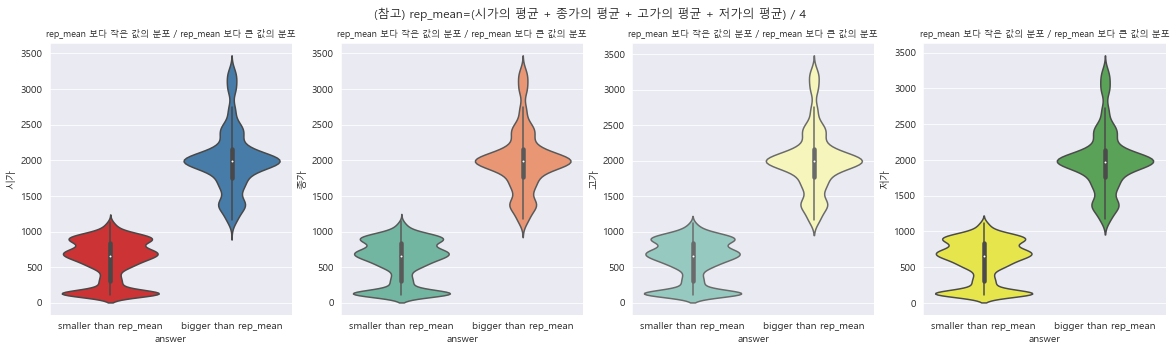

In [136]:
fig, ax=plt.subplots(1,4, figsize=(20,5))

_=sns.violinplot(x=df_copy_close["answer"], y=df_copy_open["open"], ax=ax[0], palette="Set1")
_=sns.violinplot(x=df_copy_open["answer"], y=df_copy_close["close"], ax=ax[1], palette="Set2")
_=sns.violinplot(x=df_copy_high["answer"], y=df_copy_high["high"], ax=ax[2], palette="Set3")
_=sns.violinplot(x=df_copy_low["answer"], y=df_copy_low["low"], ax=ax[3], palette="Set1_r")

_=plt.suptitle("(참고) rep_mean=(시가의 평균 + 종가의 평균 + 고가의 평균 + 저가의 평균) / 4")

for ii in range(0,4):
    _=ax[ii].set_title("rep_mean 보다 작은 값의 분포 / rep_mean 보다 큰 값의 분포", fontsize=9)
    
idx=0    
for ii in ["시가", "종가", "고가", "저가"]:
    _=ax[idx].set_ylabel(ii)
    idx+=1
    
plt.savefig("images/rep_mean보다 크거나 작은 값들의 분포.png", dpi=200, facecolor="white")

rep_mean 보다 크거나 작은 값으로 나눠서 분포를 알아보니 시가, 종가, 고가, 저가 모두 분포가 동일함을 알 수 있습니다. 그리고 rep_mean 보다 작은 데이터에서는 100 언저리와 500 ~ 1000 사이에 분포가 가장 많음을 알 수 있고, rep_mean 보다 큰 데이터에서는 2000 근처에도 꽤 많이 분포함을 알 수 있습니다.

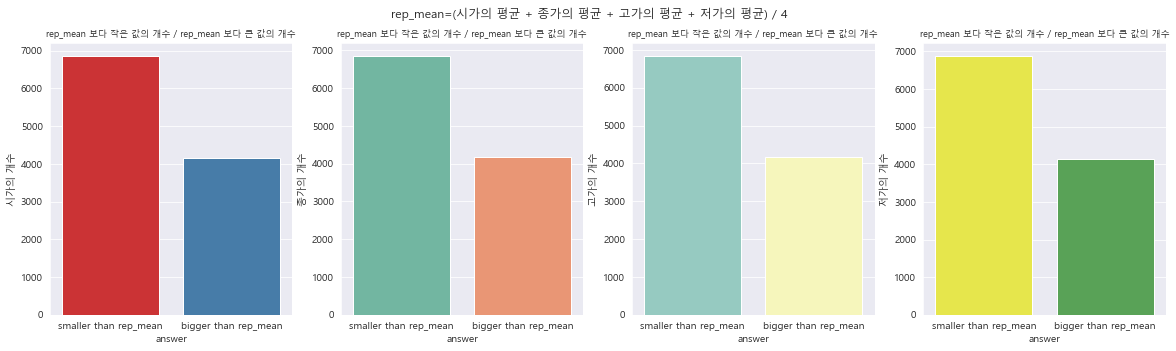

In [135]:
fig, ax=plt.subplots(1,4, figsize=(20,5))

_=sns.countplot(x=df_copy_close["answer"], ax=ax[0], palette="Set1")
_=sns.countplot(x=df_copy_open["answer"], ax=ax[1], palette="Set2")
_=sns.countplot(x=df_copy_high["answer"], ax=ax[2], palette="Set3")
_=sns.countplot(x=df_copy_low["answer"], ax=ax[3], palette="Set1_r")

_=plt.suptitle("rep_mean=(시가의 평균 + 종가의 평균 + 고가의 평균 + 저가의 평균) / 4")

for ii in range(0,4):
    _=ax[ii].set_title("rep_mean 보다 작은 값의 개수 / rep_mean 보다 큰 값의 개수", fontsize=9)
 
idx=0    
for ii in ["시가의 개수", "종가의 개수", "고가의 개수", "저가의 개수"]:
    _=ax[idx].set_ylabel(ii)
    idx+=1
    
plt.savefig("images/rep_mean보다 크거나 작은 값들의 개수.png", dpi=200, facecolor="white")

rep_mean보다 크거나 작은 값으로 나눠서 분포를 알아보니 시가, 종가, 고가, 저가 모두 개수가 동일함을 알 수 있습니다.

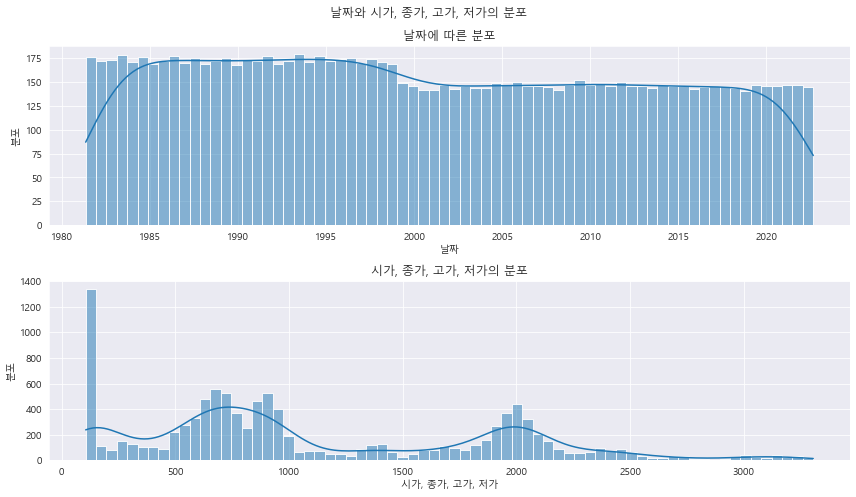

In [96]:

fig, ax=plt.subplots(2,1, figsize=(12,7))

_=sns.histplot(df_copy["date"], kde=True, ax=ax[0], bins=70)
_=sns.histplot(df_copy["open"], kde=True, ax=ax[1], bins=70)

_=ax[0].set_xlabel("날짜")
_=ax[0].set_ylabel("분포")
_=ax[1].set_xlabel("시가, 종가, 고가, 저가")
_=ax[1].set_ylabel("분포")

_=ax[0].set_title("날짜에 따른 분포")
_=ax[1].set_title("시가, 종가, 고가, 저가의 분포")

_=plt.suptitle("날짜와 시가, 종가, 고가, 저가의 분포")
plt.tight_layout()
plt.savefig("images/히스토그램 분포.png", dpi=200, facecolor="white")

bins의 개수를 70개로 잡고, 분포를 알아보았습니다.

1. 날짜는 대체로 비슷한 분포를 띄고 있습니다. 하지만 1990년 대 후반까지 좀 더 많은 분포를 차지하고 있습니다. 분포 모양은 ∩ 형태 입니다.
2. 시가, 종가, 고가, 저가는 확실히 다른 분포를 띄고 있습니다. 약 100 언저리에 가장 많은 분포를 차지하고, 500 ~ 1000 사이에 누적 분포가 가장 많아보입니다. 그리고 2000 에서도 많은 분포를 차지하고 있습니다.

In [97]:
df_copy.groupby(["dayofweek"])["volume"].sum()

dayofweek
Friday       5.620089e+11
Monday       5.287935e+11
Saturday     1.204735e+10
Thursday     5.711735e+11
Tuesday      5.737522e+11
Wednesday    5.709868e+11
Name: volume, dtype: float64

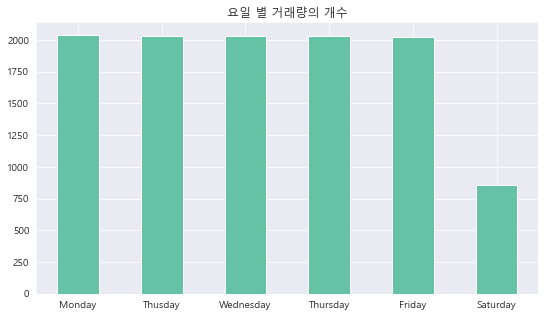

In [98]:
_=df_copy["dayofweek"].value_counts().plot.bar(figsize=(9,5), cmap="Set2")
_=plt.xticks([0,1,2,3,4,5], labels=["Monday", "Thusday", "Wednesday", "Thursday", "Friday", "Saturday"], rotation=0) 
# plt.xticks(position=[], labels=[])
_=plt.title("요일 별 거래량의 개수")

plt.savefig("images/요일 별 거래량의 개수.png", dpi=200, facecolor="white")

요일 별 거래량의 개수를 알아보았습니다. 일단 월요일, 화요일, 수요일, 목요일, 금요일은 거래량이 거의 동일함을 알 수 있습니다. (2000 언저리) 하지만, 토요일에는 거래량이 가장 적음을 알 수 있습니다. 보통 주식 거래를 평일 오전 9시부터 11시 사이까지 많이 해서 평일에 횟수가 많은 것으로 추정할 수 있습니다.

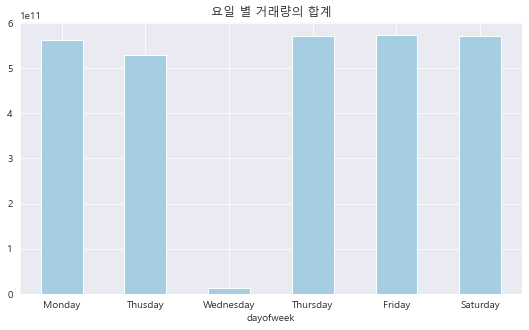

In [99]:
_=df_copy.groupby(["dayofweek"])["volume"].sum().plot.bar(figsize=(9,5), cmap="Paired")
_=plt.xticks([0,1,2,3,4,5], labels=["Monday", "Thusday", "Wednesday", "Thursday", "Friday", "Saturday"], rotation=0)
_=plt.title("요일 별 거래량의 합계")

plt.savefig("images/요일 별 거래량의 합계.png", dpi=200, facecolor="white")

요일 별 거래량의 합계를 알아보니, 수요일에 가장 적은 거래량이 나왔습니다. (거의 거래량이 없음을 알 수 있습니다.) 거래 횟수는 많지만, 실질적인 거래량은 적음을 알 수 있습니다. 의외로 토요일이 수요일을 제외한 다른 평일과 거래량이 비슷했습니다. 토요일은 거래량이 적은 대신에, 거래량의 합계가 많은 것을 알 수 있습니다.

## 3-2. 외부 데이터를 이용하여 전처리 및 시각화 수행하기.

### 3-2-1. 외부 데이터를 불러오기.

```외부 데이터 출처``` : [Kaggle Stock Index](https://www.kaggle.com/datasets/pyioneer/stock-index)

이번에 같이 이용할 데이터는 주가 지수 데이터입니다. 주가 지수는 시가 총액법으로 계산된 데이터이고, 시가 총액이 클수록, 차지 비중이 높습니다.

### 칼럼 설명

1. date : 날짜
2. s&p500 : USA 주가 지수
3. jpx400 : JAPAN 주가 지수
4. ssec : CHINA 주가 지수
5. kospi : KOREA 주가 지수

* kospi 공식 <br>
```kospi = ((오늘의 시가 총액) / (1980.1.4 까지 시가 총액)) x 100```

* 하지만, 우리는 1981년 데이터부터 있기 때문에, 원래 자료에서 kospi를 구할 수 없습니다.

In [100]:
df_si_copy=pd.read_csv("./stock_exchange_index.csv")
df_si_copy.head()

,DATE,S&P500,JPX400,SSEC,KOSPI
0,2007-01-01,NaN,NaN,NaN,1434.46
1,2007-01-02,NaN,NaN,NaN,1435.26
2,2007-01-03,1416.60,NaN,NaN,1409.35
3,2007-01-04,1418.34,14545.50,2715.72,1397.29
4,2007-01-05,1409.71,14326.44,2641.33,1385.76


In [101]:
df_si_copy.tail()

,DATE,S&P500,JPX400,SSEC,KOSPI
4378,2018-12-27,2488.83,13327.31,2483.09,2028.44
4379,2018-12-28,2485.74,13253.37,2493.90,2041.04
4380,2018-12-29,NaN,NaN,NaN,2041.04
4381,2018-12-30,NaN,NaN,NaN,2041.04
4382,2018-12-31,2506.85,NaN,NaN,2041.04


In [102]:
df_si_copy.shape

(4383, 5)

일단 칼럼을 모두 소문자로 고쳐주도록 하겠습니다.

In [103]:
df_si_copy.columns=df_si_copy.columns.str.lower()
df_si_copy.head()

,date,s&p500,jpx400,ssec,kospi
0,2007-01-01,NaN,NaN,NaN,1434.46
1,2007-01-02,NaN,NaN,NaN,1435.26
2,2007-01-03,1416.60,NaN,NaN,1409.35
3,2007-01-04,1418.34,14545.50,2715.72,1397.29
4,2007-01-05,1409.71,14326.44,2641.33,1385.76


In [104]:
df_si_copy.isnull().sum()

date         0
s&p500    1363
jpx400    1442
ssec      1463
kospi        0
dtype: int64

결측치에 나라 별 각각의 평균을 이용해서 넣어주도록 하겠습니다.

In [105]:
usa_si_mean=df_si_copy["s&p500"].mean() # 미국 주가 지수 평균
jp_si_mean=df_si_copy["jpx400"].mean() # 일본 주가 지수 평균
ch_si_mean=df_si_copy["ssec"].mean() # 중국 주가 지수 평균

print(usa_si_mean, jp_si_mean, ch_si_mean)

1696.0627218543045 11042.823968038083 2925.5733253424655


In [106]:
df_si_copy["s&p500"].fillna(usa_si_mean, inplace=True)
df_si_copy["jpx400"].fillna(jp_si_mean, inplace=True)
df_si_copy["ssec"].fillna(ch_si_mean, inplace=True)

In [107]:
df_si_copy.isnull().sum()

date      0
s&p500    0
jpx400    0
ssec      0
kospi     0
dtype: int64

In [108]:
df_si_copy.head()

,date,s&p500,jpx400,ssec,kospi
0,2007-01-01,1696.062722,11042.823968,2925.573325,1434.46
1,2007-01-02,1696.062722,11042.823968,2925.573325,1435.26
2,2007-01-03,1416.600000,11042.823968,2925.573325,1409.35
3,2007-01-04,1418.340000,14545.500000,2715.720000,1397.29
4,2007-01-05,1409.710000,14326.440000,2641.330000,1385.76


In [109]:
df_si_copy.dtypes

date       object
s&p500    float64
jpx400    float64
ssec      float64
kospi     float64
dtype: object

date의 데이터 타입을 datetime으로 변경시켜줄 것이다.

In [110]:
df_si_copy["date"]=pd.to_datetime(df_si_copy["date"])

In [111]:
df_si_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4383 non-null   datetime64[ns]
 1   s&p500  4383 non-null   float64       
 2   jpx400  4383 non-null   float64       
 3   ssec    4383 non-null   float64       
 4   kospi   4383 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


결측치도 없고, date도 datetime으로 데이터 타입을 변경해주었습니다.

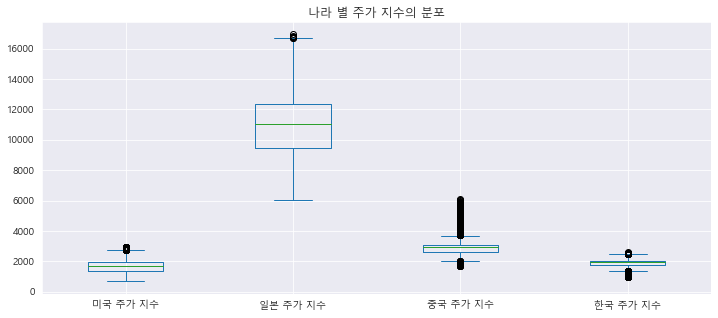

In [112]:
_=df_si_copy.plot.box(figsize=(12,5))

x_pos=[1,2,3,4]
x_label=["미국 주가 지수", "일본 주가 지수", "중국 주가 지수", "한국 주가 지수"]
_=plt.xticks(x_pos, x_label)
_=plt.title("나라 별 주가 지수의 분포")

plt.savefig("images/나라 별 주가 지수의 분포.png", dpi=200, facecolor="white")

박스 플롯을 이용하여, 각각의 주가 지수에 대해 분포를 알아볼 수 있습니다.

1. 미국 주가 지수와 한국 주가 지수는 분포의 범위가 좁은 편입니다.
2. 중국 주가 지수 또한 분포의 범위는 좁은 편이지만, 이상치가 많은 편입니다.
3. 일본 주가 지수가 가장 분포의 범위가 넓고, 중앙값 및 사분위 수가 가장 큰 편 입니다.

In [113]:
df_si_copy.head()

,date,s&p500,jpx400,ssec,kospi
0,2007-01-01,1696.062722,11042.823968,2925.573325,1434.46
1,2007-01-02,1696.062722,11042.823968,2925.573325,1435.26
2,2007-01-03,1416.600000,11042.823968,2925.573325,1409.35
3,2007-01-04,1418.340000,14545.500000,2715.720000,1397.29
4,2007-01-05,1409.710000,14326.440000,2641.330000,1385.76


In [114]:
df_si_copy.tail() # 2007 ~ 2018 까지 존재합니다.

,date,s&p500,jpx400,ssec,kospi
4378,2018-12-27,2488.830000,13327.310000,2483.090000,2028.44
4379,2018-12-28,2485.740000,13253.370000,2493.900000,2041.04
4380,2018-12-29,1696.062722,11042.823968,2925.573325,2041.04
4381,2018-12-30,1696.062722,11042.823968,2925.573325,2041.04
4382,2018-12-31,2506.850000,11042.823968,2925.573325,2041.04


In [115]:
print(usa_si_mean, jp_si_mean, ch_si_mean)

1696.0627218543045 11042.823968038083 2925.5733253424655


In [116]:
kr_si_mean=df_si_copy["kospi"].mean()
kr_si_mean

1911.1908008213552

각각의 주가 지수 평균보다 주가 지수가 큰 부분과 주가 지수가 작은 부분을 나눠주었습니다.

In [117]:
df_jp_meanup=df_si_copy.loc[df_si_copy["jpx400"]>jp_si_mean]
df_jp_meandown=df_si_copy.loc[df_si_copy["jpx400"]<jp_si_mean]

In [118]:
df_usa_meanup=df_si_copy.loc[df_si_copy["s&p500"]>usa_si_mean]
df_usa_meandown=df_si_copy.loc[df_si_copy["s&p500"]<usa_si_mean]

In [119]:
df_ch_meanup=df_si_copy.loc[df_si_copy["ssec"]>ch_si_mean]
df_ch_meandown=df_si_copy.loc[df_si_copy["ssec"]<ch_si_mean]

In [120]:
df_kr_meanup=df_si_copy.loc[df_si_copy["kospi"]>kr_si_mean]
df_kr_meandown=df_si_copy.loc[df_si_copy["kospi"]<kr_si_mean]

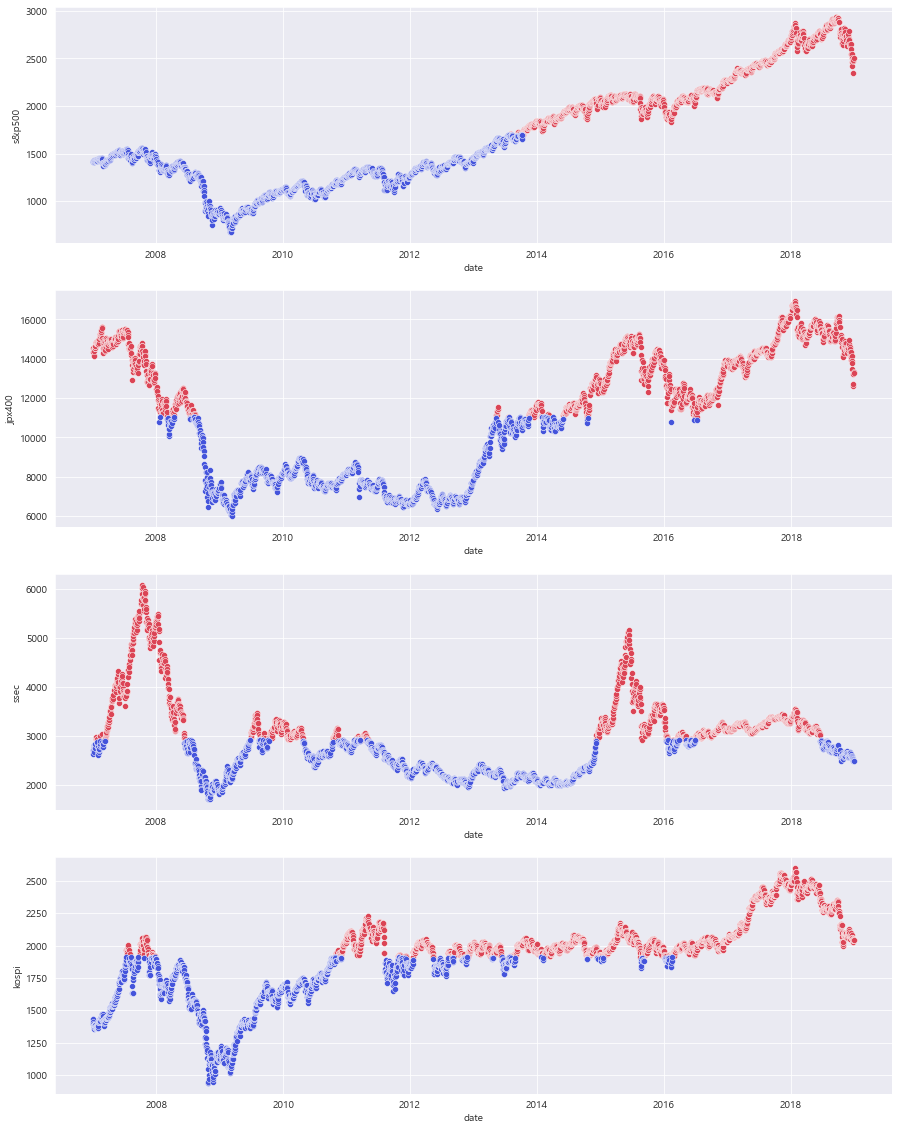

In [126]:
fig, ax=plt.subplots(4,1, figsize=(15, 20))

_=sns.scatterplot(data=df_usa_meanup, x="date", y="s&p500", ax=ax[0], color="#DB4455")
_=sns.scatterplot(data=df_usa_meandown, x="date", y="s&p500", ax=ax[0], color="#4454DB")

_=sns.scatterplot(data=df_jp_meanup, x="date", y="jpx400", ax=ax[1], color="#DB4455")
_=sns.scatterplot(data=df_jp_meandown, x="date", y="jpx400", ax=ax[1], color="#4454DB")

_=sns.scatterplot(data=df_ch_meanup, x="date", y="ssec", ax=ax[2], color="#DB4455")
_=sns.scatterplot(data=df_ch_meandown, x="date", y="ssec", ax=ax[2], color="#4454DB")

_=sns.scatterplot(data=df_kr_meanup, x="date", y="kospi", ax=ax[3], color="#DB4455")
_=sns.scatterplot(data=df_kr_meandown, x="date", y="kospi", ax=ax[3], color="#4454DB")

x축 눈금을 제가 원하는 대로 다시 설정하도록 하겠습니다.

In [122]:
list(ax[0].get_xticks())

[13149.0, 13879.0, 14610.0, 15340.0, 16071.0, 16801.0, 17532.0, 18262.0]

In [123]:
step=(ax[0].get_xticks()[-1]-ax[0].get_xticks()[0])/14
step

365.2142857142857

In [124]:
np.arange(ax[0].get_xticks()[0], ax[0].get_xticks()[-1]+1, step)

array([13149.        , 13514.21428571, 13879.42857143, 14244.64285714,
       14609.85714286, 14975.07142857, 15340.28571429, 15705.5       ,
       16070.71428571, 16435.92857143, 16801.14285714, 17166.35714286,
       17531.57142857, 17896.78571429, 18262.        ])

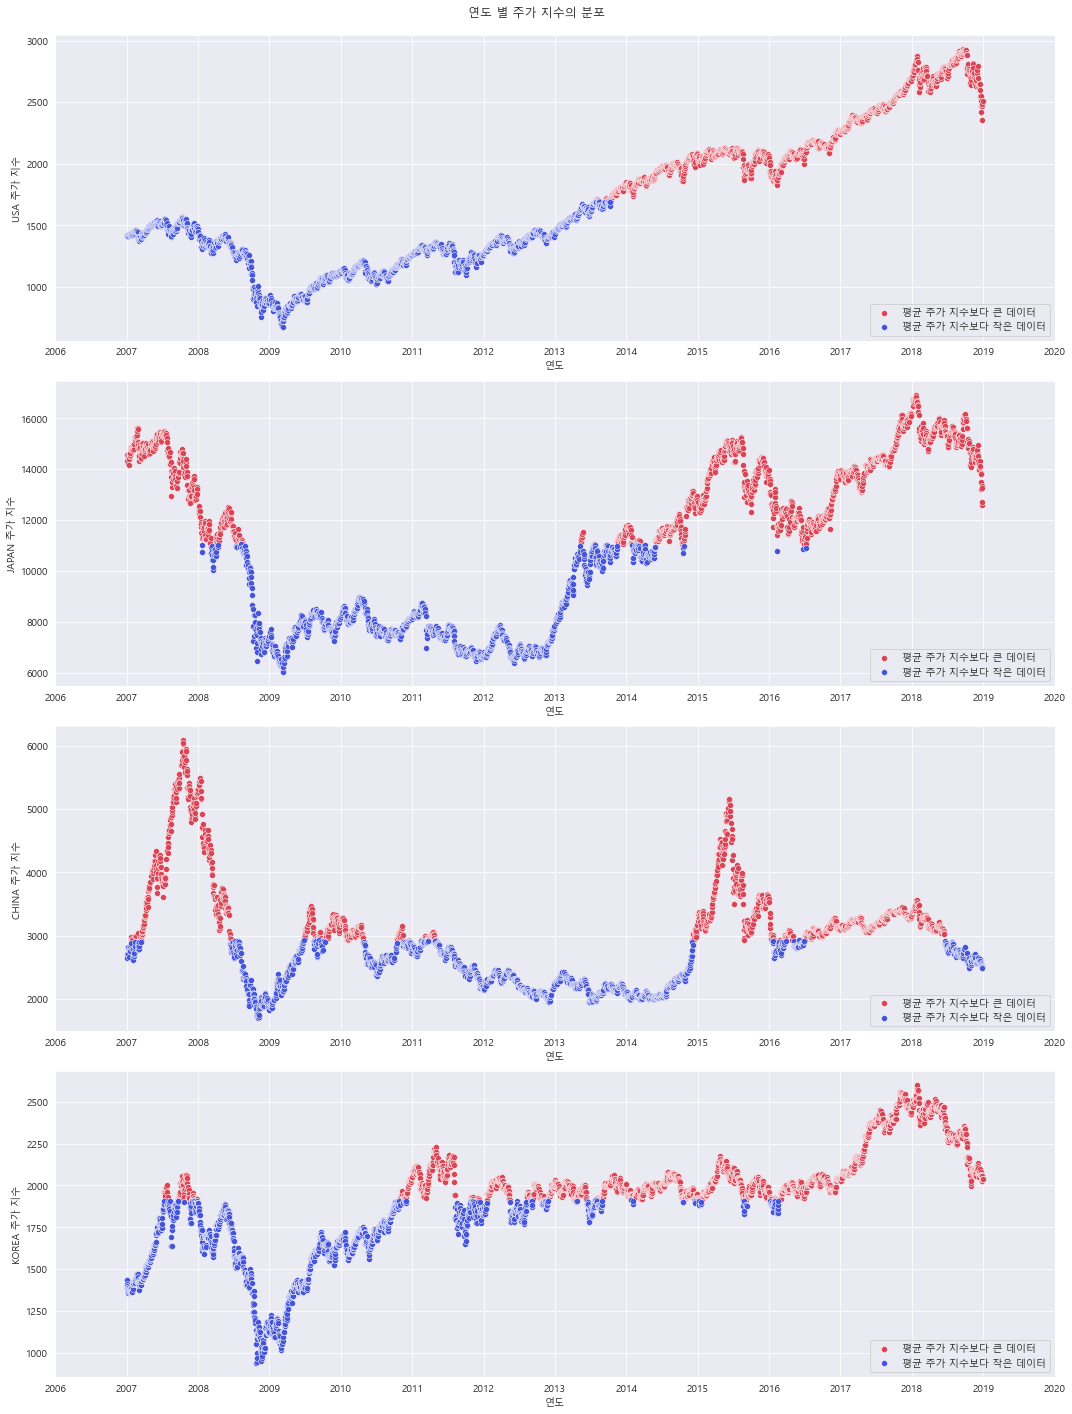

In [125]:
fig, ax=plt.subplots(4,1, figsize=(15, 20))

_=sns.scatterplot(data=df_usa_meanup, x="date", y="s&p500", ax=ax[0], color="#DB4455")
_=sns.scatterplot(data=df_usa_meandown, x="date", y="s&p500", ax=ax[0], color="#4454DB")
# _=ax[0].set_xticks(np.arange(ax[0].get_xticks()[0], ax[0].get_xticks()[-1]+1, step))
# _=ax[0].set_xticklabels(np.arange(2006, 2021, 1))

_=sns.scatterplot(data=df_jp_meanup, x="date", y="jpx400", ax=ax[1], color="#DB4455")
_=sns.scatterplot(data=df_jp_meandown, x="date", y="jpx400", ax=ax[1], color="#4454DB")

_=sns.scatterplot(data=df_ch_meanup, x="date", y="ssec", ax=ax[2], color="#DB4455")
_=sns.scatterplot(data=df_ch_meandown, x="date", y="ssec", ax=ax[2],  color="#4454DB")

_=sns.scatterplot(data=df_kr_meanup, x="date", y="kospi", ax=ax[3], color="#DB4455")
_=sns.scatterplot(data=df_kr_meandown, x="date", y="kospi", ax=ax[3], color="#4454DB")

for ii in range(0,4):
    _=ax[ii].set_xticks(np.arange(ax[ii].get_xticks()[0], ax[ii].get_xticks()[-1]+1, step))
    _=ax[ii].set_xticklabels(np.arange(2006, 2021, 1))
    
_=ax[0].set_ylabel("USA 주가 지수")
_=ax[1].set_ylabel("JAPAN 주가 지수")
_=ax[2].set_ylabel("CHINA 주가 지수")
_=ax[3].set_ylabel("KOREA 주가 지수")

for ii in range(0,4):
    _=ax[ii].set_xlabel("연도")
    _=ax[ii].legend(labels=["평균 주가 지수보다 큰 데이터", "평균 주가 지수보다 작은 데이터"], loc="lower right") # upper <-> lower

_=plt.suptitle("연도 별 주가 지수의 분포")
plt.tight_layout()
plt.subplots_adjust(top=0.96)

plt.savefig("images/연도 별 주가 지수의 분포.png", dpi=200, facecolor="white")

각각의 평균을 기준으로 평균보다 큰 주가 지수를 가진 데이터는 빨간색, 평균보다 작은 주가 지수를 가진 데이터는 파란색으로 표기하였습니다. 

1. 미국 주가 지수 : 전반적으로 계속 증가하는 형태를 띄고 있습니다.
2. 일본 주가 지수 : 2008년 초반 ~ 2015년 후반까지는 평균보다 작은 형태를 띄고 있습니다. 나머지는 평균보다 큰 데이터 입니다.
3. 중국 주가 지수 : 평균보다 큰 주가 지수와 평균보다 작은 주가 지수의 데이터가 섞여 있습니다.
4. 한국 주가 지수 : 평균보다 큰 주가 지수와 평균보다 작은 주가 지수의 데이터가 섞여 있습니다.

미국 주가 지수를 제외하고 나머지는 전반적으로 들쑥날쑥한 형태를 띄고 있습니다.

In [127]:
df_si_copy

,date,s&p500,jpx400,ssec,kospi
0,2007-01-01,1696.062722,11042.823968,2925.573325,1434.46
1,2007-01-02,1696.062722,11042.823968,2925.573325,1435.26
2,2007-01-03,1416.600000,11042.823968,2925.573325,1409.35
3,2007-01-04,1418.340000,14545.500000,2715.720000,1397.29
4,2007-01-05,1409.710000,14326.440000,2641.330000,1385.76
...,...,...,...,...,...
4378,2018-12-27,2488.830000,13327.310000,2483.090000,2028.44
4379,2018-12-28,2485.740000,13253.370000,2493.900000,2041.04
4380,2018-12-29,1696.062722,11042.823968,2925.573325,2041.04
4381,2018-12-30,1696.062722,11042.823968,2925.573325,2041.04


In [128]:
corr=df_si_copy.corr()
corr

,s&p500,jpx400,ssec,kospi
s&p500,1.000000,0.773663,0.172123,0.669972
jpx400,0.773663,1.000000,0.503606,0.427529
ssec,0.172123,0.503606,1.000000,0.150389
kospi,0.669972,0.427529,0.150389,1.000000


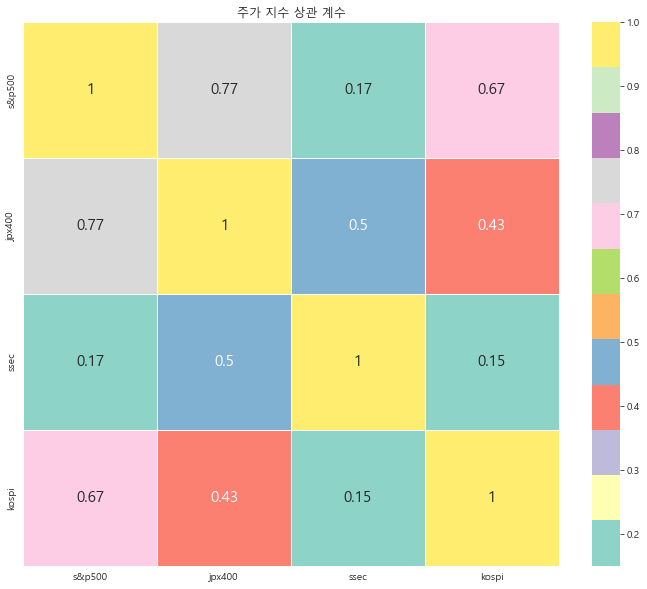

In [129]:
fig,ax = plt.subplots(figsize=(12,10))

_=sns.heatmap(corr, linewidths=.5, annot=True, cmap="Set3", annot_kws={"size":15})
_=plt.title("주가 지수 상관 계수")

plt.savefig("images/주가 지수 상관 계수.png", dpi=200, facecolor="white")

1. 상관 관계가 높은 관계

* 미국 주가 지수 ~ 일본 주가 지수
* 일본 주가 지수 ~ 미국 주가 지수
* 미국 주가 지수 ~ 한국 주가 지수
* 한국 주가 지수 ~ 미국 주가 지수

2. 상관 관계가 낮은 관계

* 중국 주가 지수 ~ 한국 주가 지수
* 한국 주가 지수 ~ 중국 주가 지수

미국와 일본, 그리고 한국과 미국은 주가 지수 간의 관계성이 큰 편입니다. (종속적이다. 서로 영향을 끼치고 있습니다.) <br>
중국과 한국은 주가 지수 간의 관계성이 거의 없는 편입니다. 

In [130]:
df_si_copy.head()

,date,s&p500,jpx400,ssec,kospi
0,2007-01-01,1696.062722,11042.823968,2925.573325,1434.46
1,2007-01-02,1696.062722,11042.823968,2925.573325,1435.26
2,2007-01-03,1416.600000,11042.823968,2925.573325,1409.35
3,2007-01-04,1418.340000,14545.500000,2715.720000,1397.29
4,2007-01-05,1409.710000,14326.440000,2641.330000,1385.76


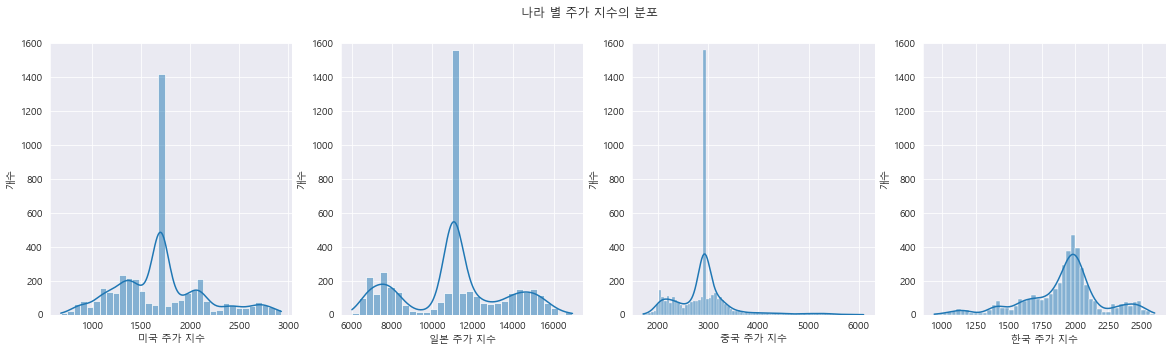

In [131]:
fig, ax=plt.subplots(1,4, figsize=(20,5))

_=sns.histplot(data=df_si_copy, x="s&p500", kde=True, ax=ax[0])
_=sns.histplot(data=df_si_copy, x="jpx400", kde=True, ax=ax[1])
_=sns.histplot(data=df_si_copy, x="ssec", kde=True, ax=ax[2])
_=sns.histplot(data=df_si_copy, x="kospi", kde=True, ax=ax[3])

for ii in range(0,4):
    _=ax[ii].set_ylabel("개수")
    
idx=0 
for ii in ["미국 주가 지수", "일본 주가 지수", "중국 주가 지수", "한국 주가 지수"]:
    _=ax[idx].set_xlabel(ii)
    _=ax[idx].set_ylim([0, 1600])
    idx+=1
    
_=plt.suptitle("나라 별 주가 지수의 분포")
plt.savefig("images/나라 별 주가 지수의 개수 분포.png", dpi=200, facecolor="white")

나라 별 주가 지수의 분포를 알 수 있습니다. 한국 주가 지수는 다른 나라에 비해 대체로 비슷하게 분포되어 있습니다. (다른 나라는 어느 한 지점에서 분포가 많이 되어 있음을 알 수 있습니다.) 그리고 이 그래프에서도 일본 주가 지수가 다른 나라에 비해 높음을 알 수 있습니다. 

# 4. Review

## 4-1. Dacon 데이터 관련 Review

1. 연도 별, 날짜 별 거래량 최대, 최소 분포 알아보기.

* 전체적으로 ~ 4e^9주까지 분포합니다.
* 최대 분포는 ~2e^9주까지 분포하고, 0 ~ e^9주 사이에 많이 분포합니다.
* 최소 분포는 0에서 가장 많이 분포합니다.
* 2002년, 2021년에 가장 많이 차이 나고 전체적으로 증가하는 그래프를 가지고 있습니다.

2. 월, 연도로 나누지 않고 전반적으로 바라보았을 때, 분포 알아보기.

* 최대 분포는 0에서 가장 많았고, 그 다음에 0.5에서 많았습니다. 0 ~ 3.5e^9 주 사이에 분포합니다.
* 최소 분포는 0에서 가장 많았고, 그 다음에 0 ~ 0.5에사 많았습니다. 0 ~ e^9 주 언저리에 분포합니다.

3. 고가와 저가의 분포

* 전체적으로 같이 증가하는 그래프를 가지고 있습니다. (계속 증가하는 그래프는 아닙니다.)
* 전체 거래량이 2002년, 2021년에 급격하게 증가하였습니다.
* 등락률 차이가 큰 지점과 거래량이 큰 지점이 일치하지 않습니다. 서로 관계가 없음을 알 수 있습니다.

4. 상관 관계

(1) 완벽한 정비례 관계 & 연관성이 큼 : 자기 자신과의 관계가 1이기 때문에, 상관계수가 1이면 완벽한 정비례 관계를 의미합니다.

* close ~ open 
* close ~ high
* close ~ low
* open ~ high
* open ~ low
* high ~ low
* change ~ monthly_ratio
* close ~ pd_close
* open ~ pd_close
* high ~ pd_close
* low ~ pd_close

(2) 정비례 관계 : 상관계수가 양수이기 때문에, 연관성이 꽤 있는 편입니다.

* year ~ pd_close
* close ~ year
* open ~ year
* high ~ year
* low ~ year


(3) 반비례 관계 : 상관계수가 음수이기 때문에, 연관성이 꽤 약한 편입니다.

* open ~ month
* close ~ month
* high ~ month
* low ~ month


5. 1980년 대 ~ 2020년 대 등락률 분포 알아보기.

* 양수 등락률은 ∪ 모양을 띄고, 음수 등락률은 ∩ 모양을 띕니다.
* 전체적으로 초반과 후반 부분에서 차이가 크고, 0 기준 대칭 모양을 띄고 있습니다.

* 1980년 대 : 1985년 ~ 1986년 사이에 가장 적습니다.
* 1990년 대 : 1998년 ~ 2000년 사이에 가장 많습니다.
* 2000년 대 : 2009년 언저리에 가장 많습니다.
* 2010년 대 : 2011년 ~ 2012년에 가장 많습니다.
* 2020년 대 : 2020년 초반에 가장 많습니다.

6. 전일 종가, 종가 분포 알아보기.

* 전반적으로 증가하는 그래프입니다.
* 전일 종가와 종가는 거의 비슷합니다.

7. 누적 분포 알아보기.

* 날짜 : 누적 분포가 일차 함수 모양을 띄고 있습니다. (날짜의 분포가 거의 비슷함을 알 수 있습니다.)
* 나머지 (시가, 종가, 고가, 저가) : 500 ~ 1000 부근에서 20% 비율을 차지하고, 가장 많은 비율임을 알 수 있습니다.

8. rep_mean 관련 분포 알아보기.

* ```rep_mean : 시가, 종가, 고가, 저가의 평균을 의미합니다.```
* rep_mean 보다 작은 데이터의 분포 : 100 언저리와 500 ~ 1000 사이에 가장 많이 분포합니다.
* rep_mean 보다 큰 데이터의 분포 : 2000에서 가장 많이 분포합니다.
* 시가, 종가, 고가, 저가 모두 개수는 동일합니다.

9. bins를 70개로 했을 때, 히스토그램

* ~ 1990 년 대 후반까지 좀 더 많이 분포하였습니다.
* 100 언저리에 가장 많았고, 500 ~ 1000, 2000에 많았습니다.

10. 요일 별 거래량 개수와 합계 분포 알아보기.

* 평일 거래 수량은 비슷하고, 많은 편입니다. 토요일은 평일에 비해 굉장히 적습니다.
* 토요일에 거래 수량이 적었고, 거래량은 많았습니다. 그리고 수요일은 거래 수량은 많았으나, 거래량이 적었습니다.

## 4-2. 외부 데이터 관련 Review

1. 각각의 주가 지수에 대한 분포 알아보기.

* 미국 주가 지수와 한국 주가 지수는 분포의 범위가 좁은 편입니다.
* 중국 주가 지수 또한 분포의 범위는 좁은 편이지만, 이상치가 많은 편입니다.
* 일본 주가 지수가 가장 분포의 범위가 넓고, 중앙값 및 사분위 수가 가장 큰 편 입니다.

2. 평균보다 큰 주가 지수와 평균보다 작은 주가 지수의 분포 알아보기.

각각의 평균을 기준으로 평균보다 큰 주가 지수를 가진 데이터는 빨간색, 평균보다 작은 주가 지수를 가진 데이터는 파란색으로 표기하였습니다. 

* 미국 주가 지수 : 전반적으로 계속 증가하는 형태를 띄고 있습니다.
* 일본 주가 지수 : 2008년 초반 ~ 2015년 후반까지는 평균보다 작은 형태를 띄고 있습니다. 나머지는 평균보다 큰 데이터 입니다.
* 중국 주가 지수 : 평균보다 큰 주가 지수와 평균보다 작은 주가 지수의 데이터가 섞여 있습니다.
* 한국 주가 지수 : 평균보다 큰 주가 지수와 평균보다 작은 주가 지수의 데이터가 섞여 있습니다.

미국 주가 지수를 제외하고 나머지는 전반적으로 들쑥날쑥한 형태를 띄고 있습니다.

3. 상관 관계

(1) 상관 관계가 높은 관계

* 미국 주가 지수 ~ 일본 주가 지수
* 일본 주가 지수 ~ 미국 주가 지수
* 미국 주가 지수 ~ 한국 주가 지수
* 한국 주가 지수 ~ 미국 주가 지수

(2) 상관 관계가 낮은 관계

* 중국 주가 지수 ~ 한국 주가 지수
* 한국 주가 지수 ~ 중국 주가 지수

* 미국와 일본, 그리고 한국과 미국은 주가 지수 간의 관계성이 큰 편입니다. (종속적이다. 서로 영향을 끼치고 있습니다.)
* 중국과 한국은 주가 지수 간의 관계성이 거의 없는 편입니다. 

4. 나라 별 주가 지수의 분포 알아보기.

* 한국 주가 지수는 다른 나라에 비해 대체로 비슷하게 분포되어 있습니다. (다른 나라는 어느 한 지점에서 분포가 많이 되어 있음을 알 수 있습니다.)
* 이 그래프에서도 일본 주가 지수가 다른 나라에 비해 높음을 알 수 있습니다. 